<a href="https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/projects/project-notebooks/Heatwaves_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/projects/project-notebooks/Heatwaves_2024.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Heatwaves

**Content creators:** Hotspotters, EL

  <img src='../template-images/2024_Heatwaves.svg'>

## Project Setup

In [2]:
# import packages
#import xclim
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import cartopy.feature as cfeature
import cartopy.crs as ccrs

#from xclim.core.calendar import percentile_doy

In [ ]:
# @title Helper functions
import os
import pooch
import tempfile

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "."  # data files are in the same directory as this notebook
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [4]:
# @title Figure settings

import ipywidgets as widgets       # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle")

## ECMWF Reanalysis v5 (ERA5): Air Temperature at 2m


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

fname_ERA5 = "Ouagadougou_1991_2024_daily.nc"
ds = xr.open_dataset(fname_ERA5)

print("Data variables:", ds.data_vars)
print("\nTime dimension:", ds.time.values)
print("Time dtype:", ds.time.dtype)
print("\nDimensions:")
print(ds.dims)
print("\nCoordinates:")
print(ds.coords)

print(ds.valid_time)  # or ds.time if that's the coordinate
print("Start:", ds.valid_time.min().values)
print("End:", ds.valid_time.max().values)
print("Number of time points:", ds.valid_time.size)
print(ds.valid_time[:10].values)
print("Number of NaNs in t2m:", ds.t2m.isnull().sum().values)
print("Latitudes:", ds.latitude.values)
print("Longitudes:", ds.longitude.values)


import matplotlib.pyplot as plt

ds.t2m.isel(valid_time=0).plot()
plt.title("ERA5-Land 2m Temperature - first day")
plt.show()

Let's visualize the distribution of the annual mean near-surface temperature for the year 2000 in the given area around the equator. After calculating the anomaly according to the hints included in the template, you should be able to visualize the answer to **Question 1** similarly.

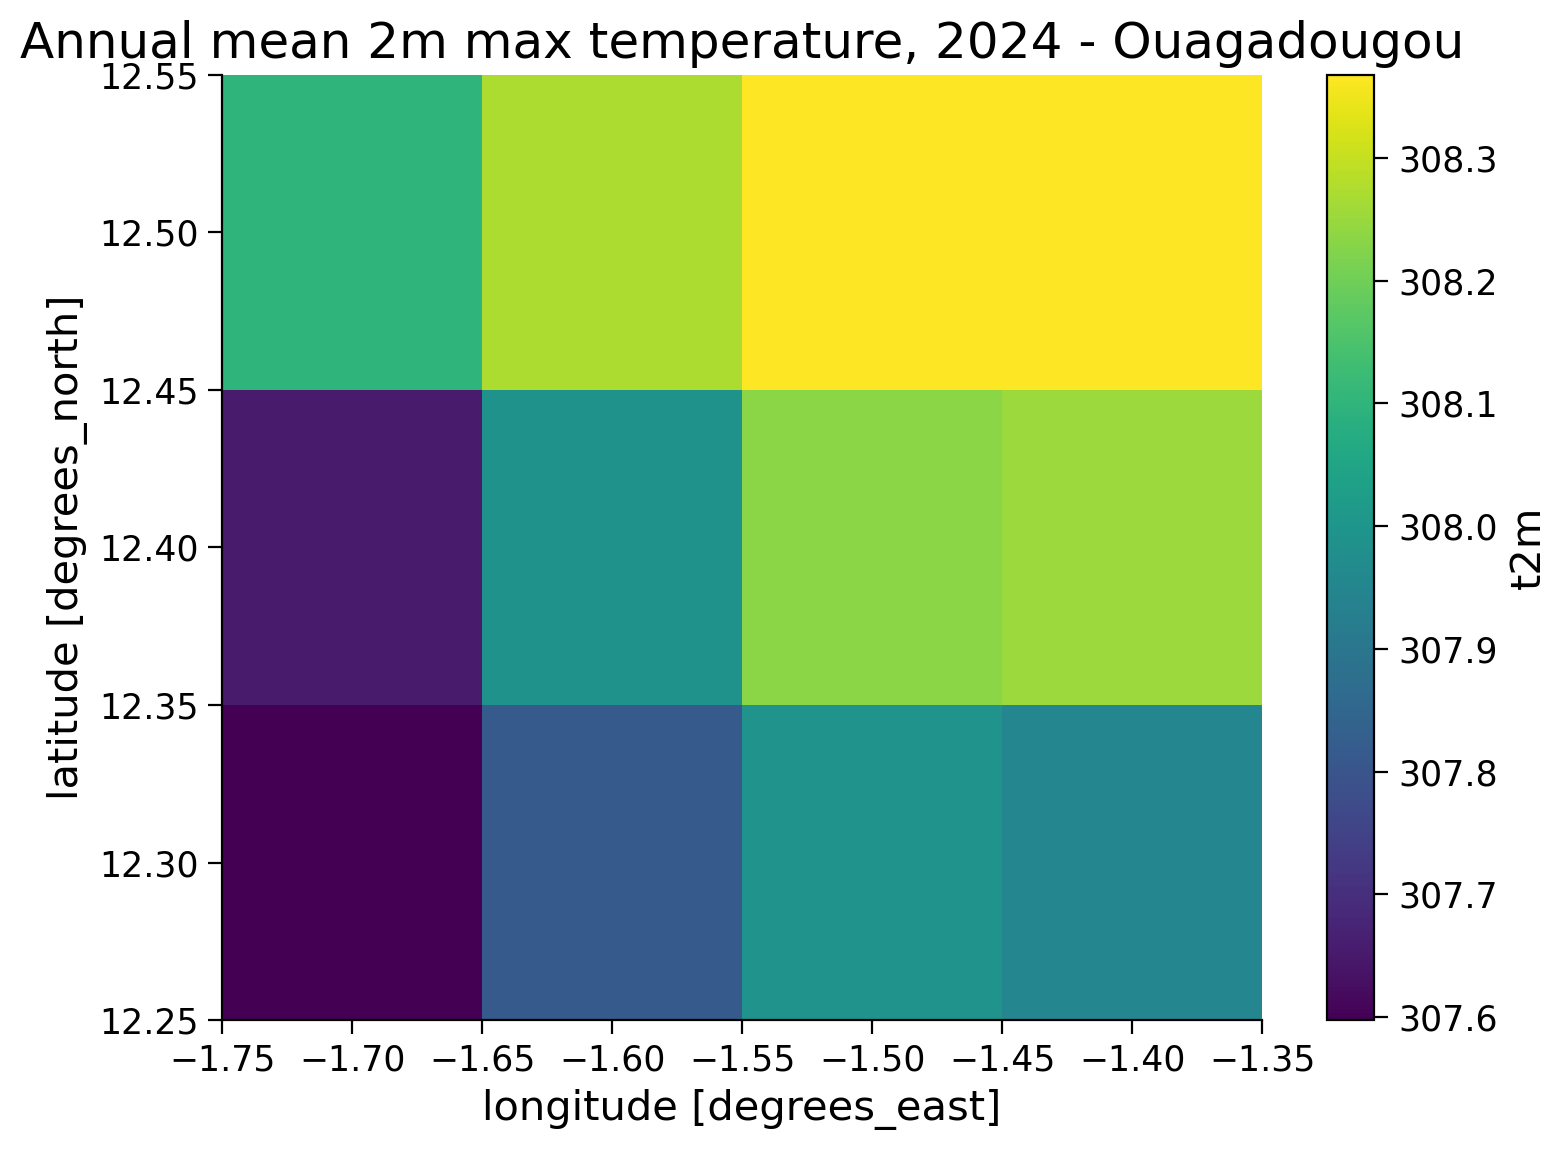


TIME SERIES FOR 2024


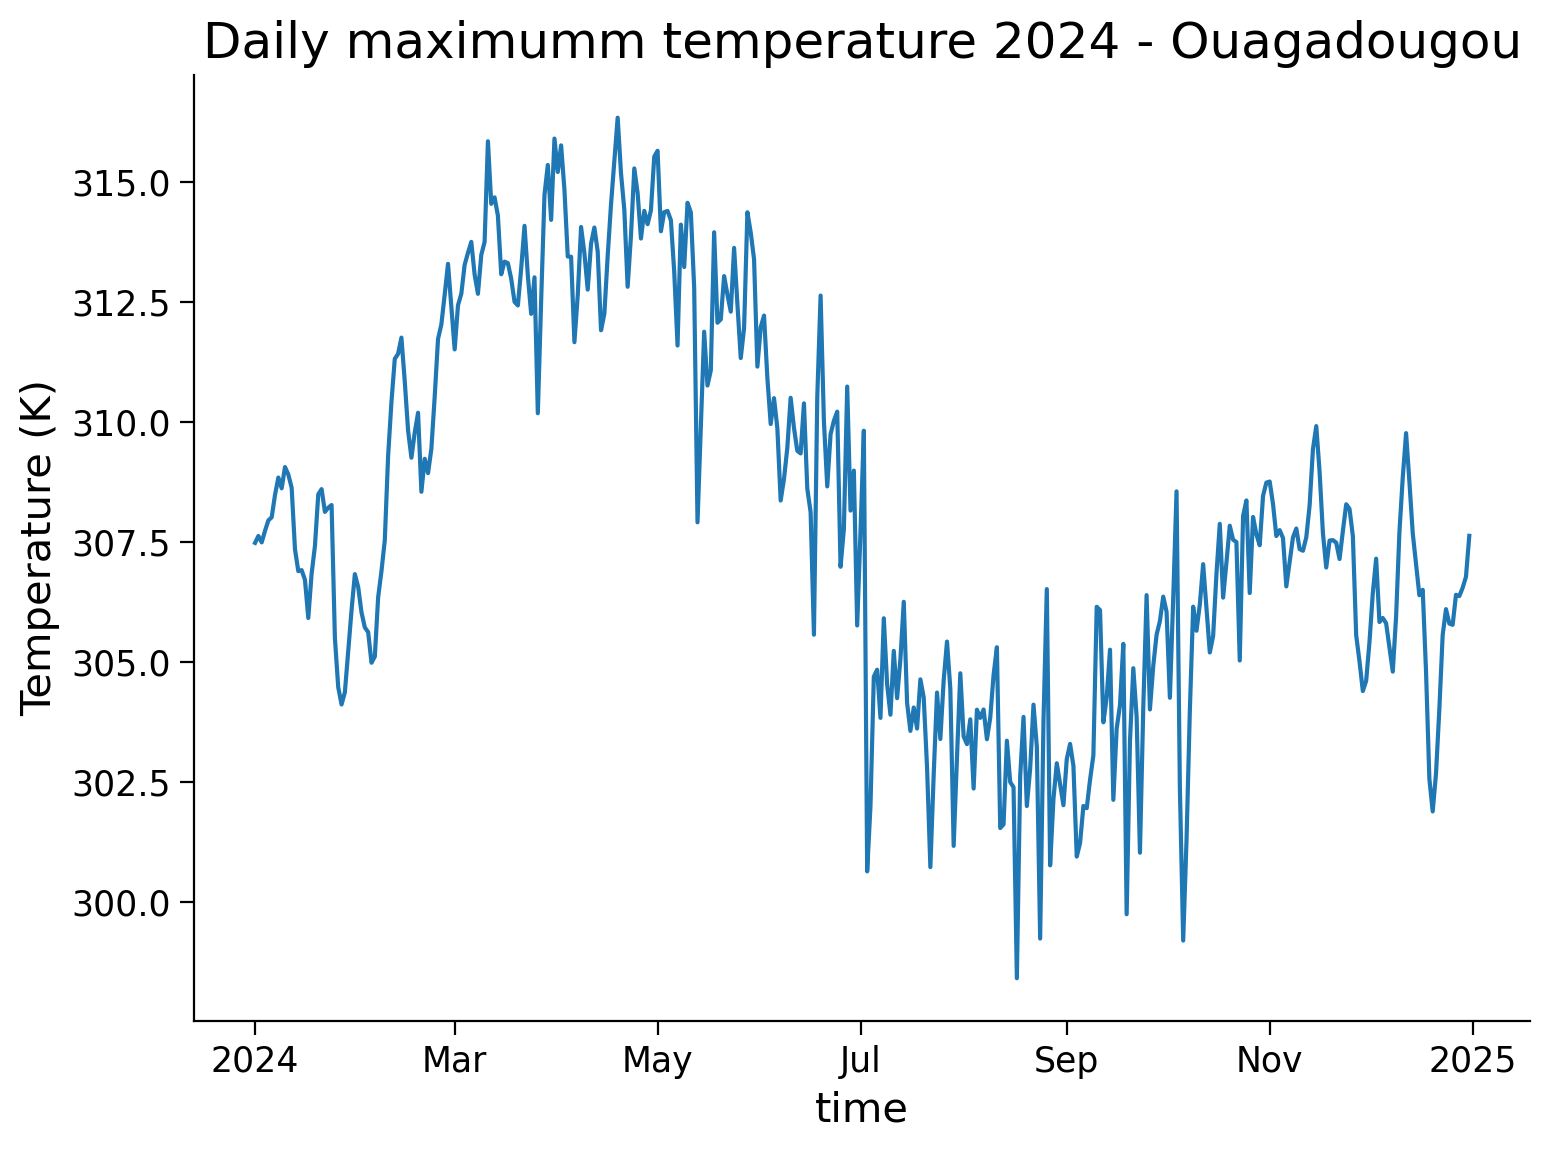

In [6]:


# Select 2024 data using valid_time (not time)
year_2024 = ds.t2m.sel(valid_time=slice("2024-01-01", "2024-12-31"))

# Average over time dimension and valid_time to get spatial map
year_mean = year_2024.mean(dim=["time", "valid_time"])
# Plot
# Plot
year_mean.plot()
plt.title("Annual mean 2m max temperature, 2024 - Ouagadougou")
plt.show()

# Plot the time series for 2024
print("\n" + "="*60)
print("TIME SERIES FOR 2024")
print("="*60)
# Average over time (the 31 values) and space to get daily time series
daily_2024 = year_2024.mean(dim=["time", "latitude", "longitude"])
daily_2024.plot()
plt.title("Daily maximumm temperature 2024 - Ouagadougou")
plt.ylabel("Temperature (K)")
plt.show()





In [ ]:
fname_ERA5 = "Ouagadougou_1991_2024_daily.nc"
ds_long = xr.open_dataset(fname_ERA5)

In [8]:
ds_long.time
nan_count_per_time = ds_long.t2m.isnull().sum(dim=["valid_time","latitude","longitude"])
print(nan_count_per_time.values)
import numpy as np

nan_count = nan_count_per_time.values
real_time_indexes = np.where(nan_count == nan_count.min())[0]
real_time_indexes

ds_long = ds_long.mean(dim="time", skipna=True)



[131508 131496 131508 131508 131508 131496 131508 131508 131508 131496
 131508 131508 131508 131496 131508 131508 131508 131496 131508 131508
 131508 131496 131508 131508 131508 131496 131508 131508 131508 131496
 131496]


In [9]:
ds_long

<xarray.Dataset> Size: 634kB
Dimensions:     (valid_time: 11324, latitude: 3, longitude: 4)
Coordinates:
  * latitude    (latitude) float64 24B 12.5 12.4 12.3
  * longitude   (longitude) float64 32B -1.7 -1.6 -1.5 -1.4
  * valid_time  (valid_time) datetime64[ns] 91kB 1991-01-01 ... 2024-12-31
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 544kB 301.6 ... 307.8

In [11]:
print(ds_long.t2m.values[:5])


[[[301.5639  301.62054 301.6303  301.601  ]
  [301.30804 301.4975  301.61664 301.57953]
  [301.31976 301.42523 301.48187 301.38812]]

 [[301.92896 301.9973  302.00903 301.9348 ]
  [301.66724 301.86646 301.97778 301.91333]
  [301.65747 301.78247 301.85474 301.7395 ]]

 [[302.2102  302.27856 302.29224 302.2102 ]
  [301.97974 302.177   302.27466 302.2063 ]
  [301.98364 302.10278 302.18286 302.06177]]

 [[303.55627 303.6676  303.73987 303.71057]
  [303.39026 303.6305  303.7672  303.74963]
  [303.43713 303.58752 303.72424 303.63245]]

 [[304.59973 304.67395 304.7013  304.64465]
  [304.4181  304.62708 304.72864 304.68567]
  [304.46106 304.5802  304.68372 304.56848]]]


/Users/elindner/miniforge3/envs/geo/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


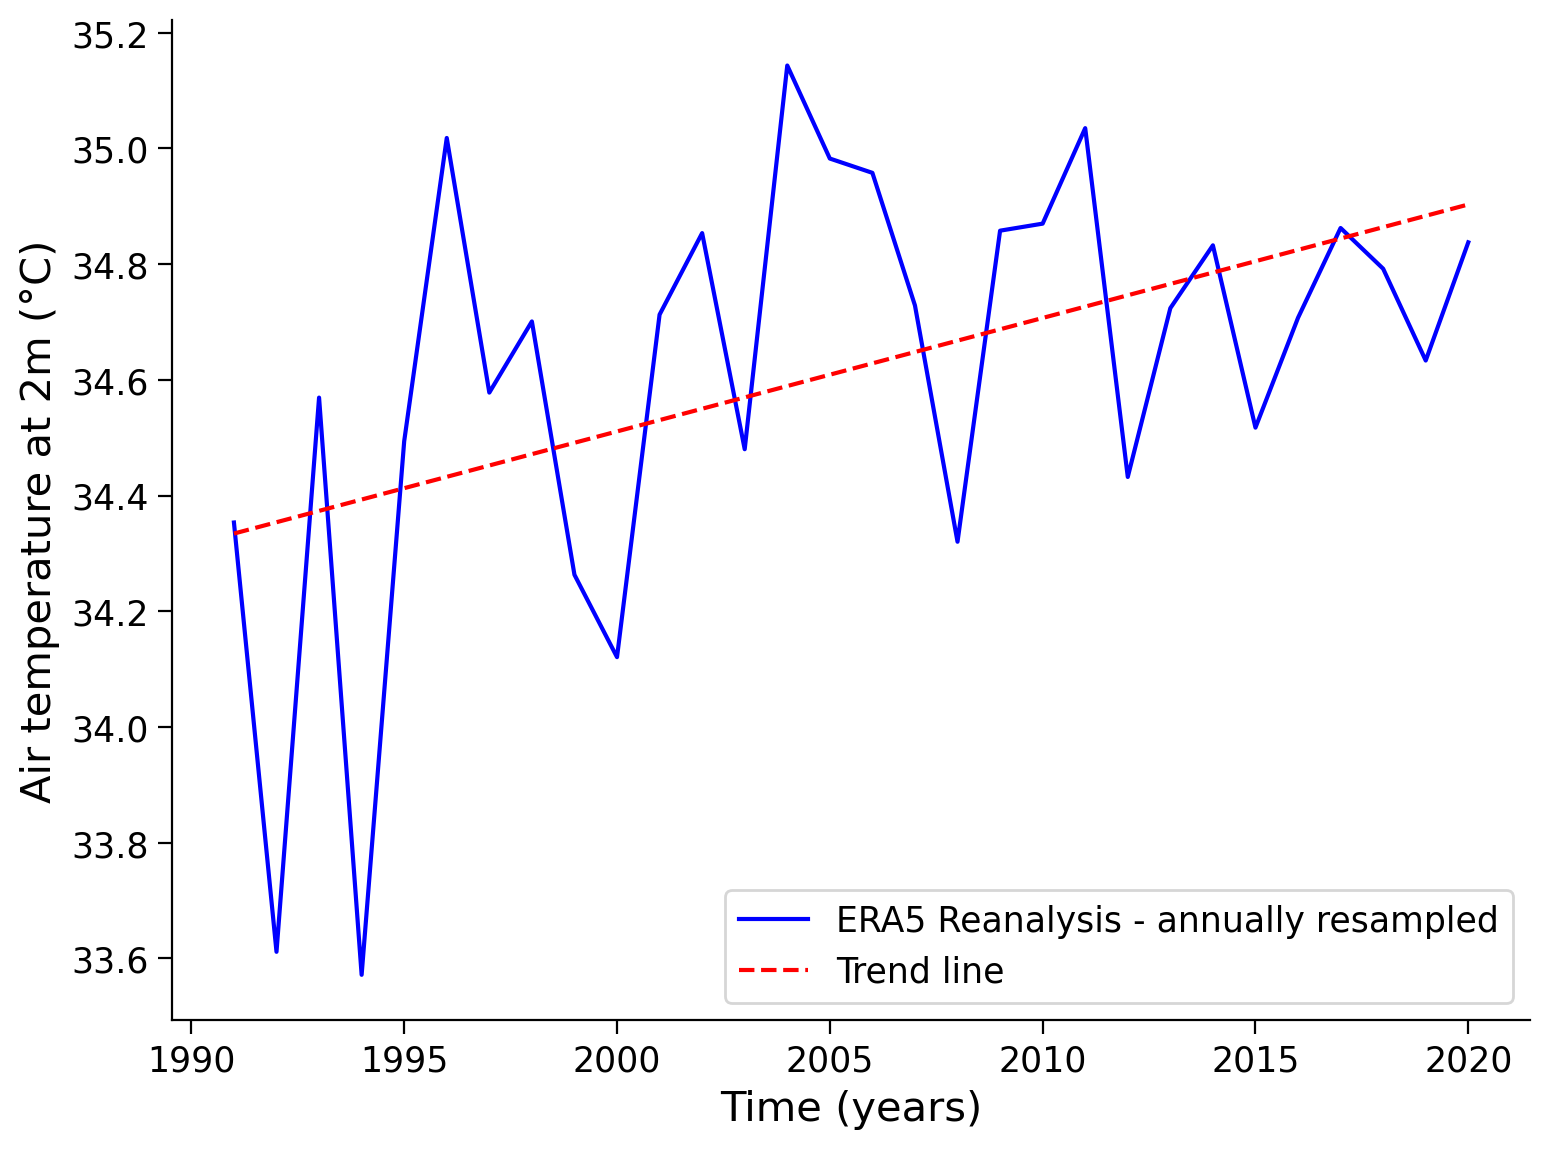

In [12]:
# find the last year of the dataset
last_year = ds_long['valid_time.year'].max().item()

# filter the 30 year reference 1991-2020
ds_30y = ds_long.sel(valid_time=slice("1991-01-01", "2020-12-31"))

# calculate the mean temperature for each year 
mean_time_dim = ds_30y['t2m'].resample(valid_time="Y").mean()

# apply cosine of latitude as weights to the dataset variables
weights = np.cos(np.deg2rad(mean_time_dim.latitude))
weighted_mean_time_dim = mean_time_dim.weighted(weights)

# calculate the mean in degrees celsius
weighted_global_mean_temp = weighted_mean_time_dim.mean(dim=["longitude","latitude"])
weighted_global_mean_temp_c = weighted_global_mean_temp - 273.15

# calculate the trend line
years = weighted_global_mean_temp_c['valid_time'].dt.year.values
annual_temperature = weighted_global_mean_temp_c.values
trend_coefficients = np.polyfit(years, annual_temperature, 1)
trend_line = np.poly1d(trend_coefficients)

# draw data
plt.plot(years, annual_temperature, color="blue", label="ERA5 Reanalysis - annually resampled")
plt.plot(years, trend_line(years), color="red", linestyle="--", label='Trend line')

# aesthetics
plt.xlabel("Time (years)")
plt.ylabel("Air temperature at 2m (°C)")
plt.legend()

In [14]:
weighted_global_mean_temp_c 


<xarray.DataArray 't2m' (valid_time: 30)> Size: 240B
array([34.35337122, 33.61152771, 34.56917694, 33.57177231, 34.49382853,
       35.01781237, 34.57782896, 34.70079423, 34.26307369, 34.12068904,
       34.7125765 , 34.85343243, 34.48000737, 35.14304434, 34.982282  ,
       34.95754622, 34.72841961, 34.32011167, 34.85762896, 34.86978823,
       35.03480417, 34.43206451, 34.72372832, 34.83230789, 34.51728525,
       34.70709452, 34.86226104, 34.79187655, 34.6332521 , 34.83748898])
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 240B 1991-12-31 ... 2020-12-31

---

# Ouagadougou heatwaves study

In [15]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#conda install scipy

from scipy.ndimage import label

In [16]:
# data import

daily_normal_data =  ds_long.t2m.sel(valid_time=slice("1991","2020"))
monthly_normal_data = daily_normal_data.groupby('valid_time.month').mean().compute()
# monthly_data.resample(valid_time="ME").mean()

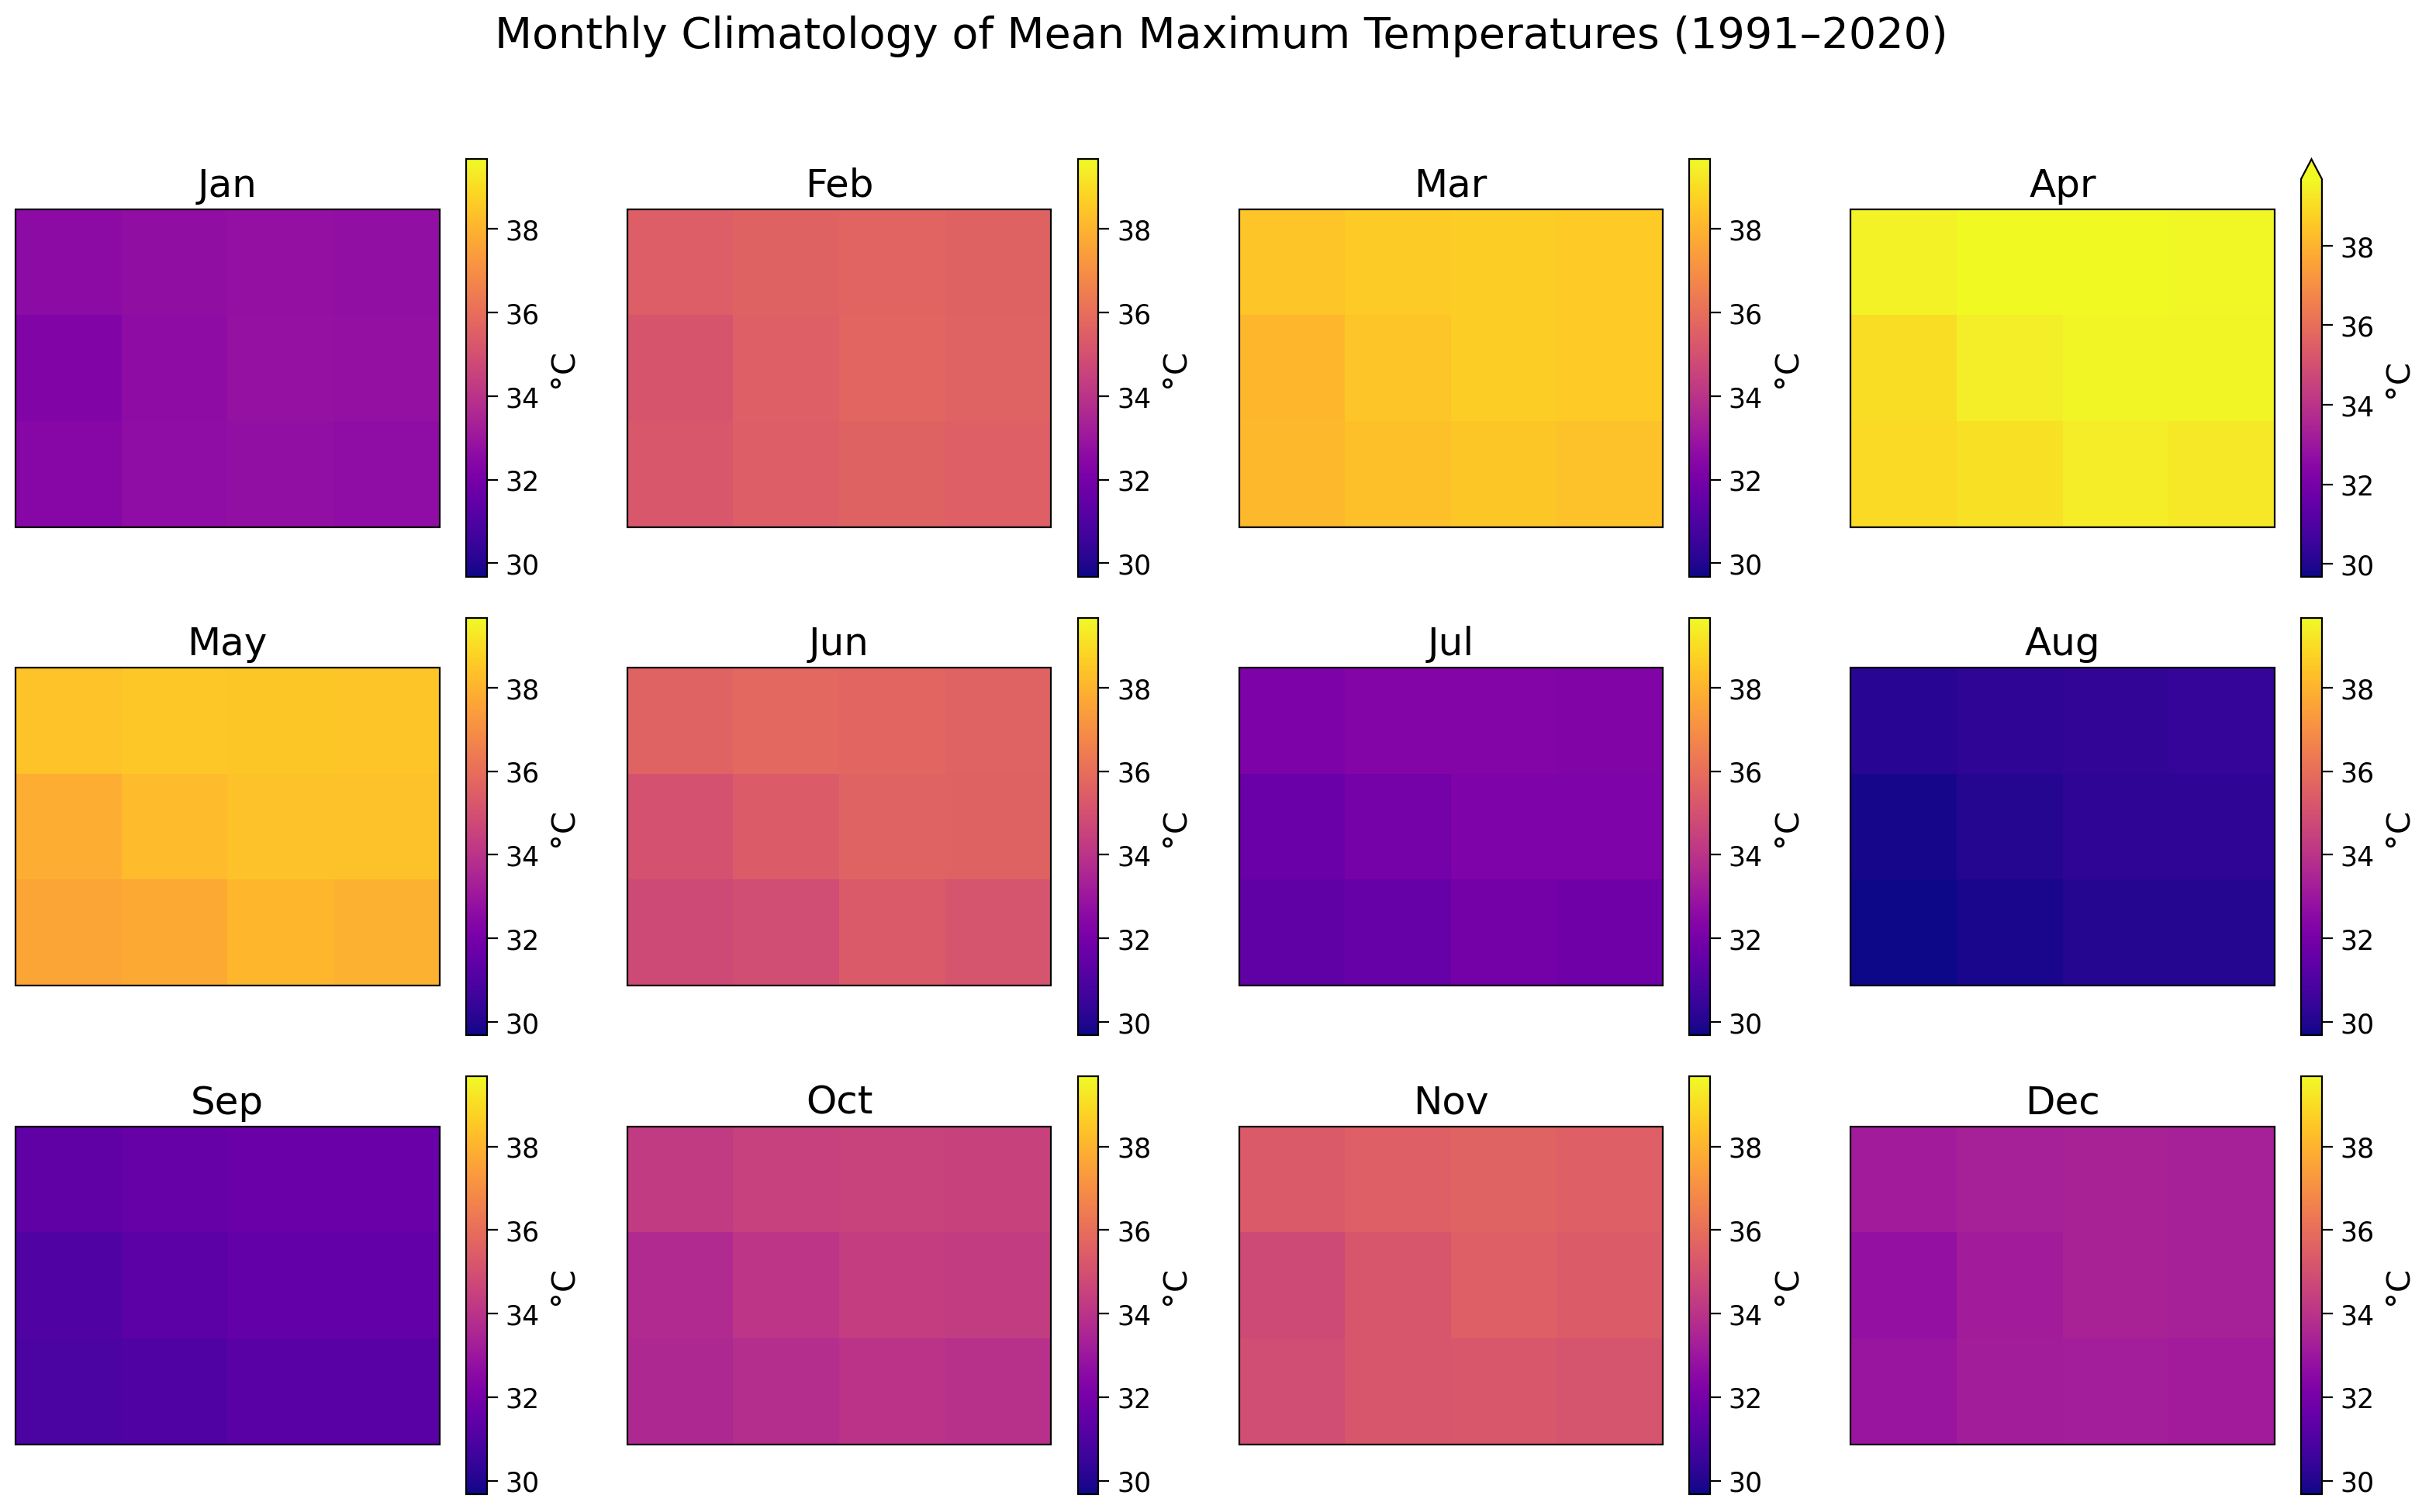

In [17]:

# monthly 1991-2020 plot of maximum temperature
# 5. Tracer une carte pour chaque mois

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10),
                         subplot_kw={'projection': ccrs.PlateCarree()},
                        sharey=True)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
vmin = monthly_normal_data.min().item() -273.15
vmax = monthly_normal_data.max().item() -273.15

for i, ax in enumerate(axes.flat):
    (monthly_normal_data[i]-273.15).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax,
        cbar_kwargs={'label': '°C'},
        #add_colorbar=(i == 0)
    )
    ax.set_title(months[i])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

plt.suptitle("Monthly Climatology of Mean Maximum Temperatures (1991–2020)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
def compute_rolling_percentile_calendar_day( da,window=15,percentile=90,time_dim='valid_time'):
    """
    Computes a rolling percentile (e.g., 90th) for each calendar day (1–366)
    over multiple years using a moving window (±window days), with wrap-around handling.

    Parameters:
    ----------
    da : xr.DataArray
        Daily data (e.g., maximum temperature) with a time coordinate.
    time_dim : str
        Name of the time dimension. Default is 'time'.
    window : int
        Half-width of the moving window (e.g., 15 → ±15 days).
    percentile : float
        Percentile to compute (e.g., 90 for the 90th percentile).

    Returns:
    --------
    xr.DataArray
        Rolling percentile threshold per calendar day (from day 1 to 366).
    """
    # S'assurer qu'on a bien la coordonnée jour de l'année
    da = da.copy()
    da.coords['dayofyear'] = da[time_dim].dt.dayofyear

    days = np.arange(1, 367)  # 1 à 366
    results = []

    for doy in days:
        # Fenêtre glissante avec wrap-around
        window_days = np.arange(doy - window, doy + window + 1)
        window_days = (window_days - 1) % 366 + 1  # wrap-around

        # Sélection des données
        window_data = da.sel({time_dim: da['dayofyear'].isin(window_days)})

        # Calcul du percentile sur la dimension temporelle
        q = window_data.reduce(np.nanpercentile, q=percentile, dim=time_dim)

        results.append(q)

    # Empilement du résultat sur les jours de l’année
    result_da = xr.concat(results, dim='dayofyear')
    result_da = result_da.assign_coords(dayofyear=days)

    return result_da


In [19]:
# computation of temperature over longitude and latitude to get a time serie for heatwave detection
weights = np.cos(np.deg2rad(ds_long.latitude))
data_ts = (ds_long.weighted(weights).mean(dim=['longitude','latitude']) - 273.15).compute()
data_ts = data_ts.assign_coords({"dayofyear": data_ts.valid_time.dt.dayofyear})
# 90 th percentile computation
normal_ts = data_ts.sel(valid_time=slice('1991','2020'))
normal_ts.assign_coords({"dayofyear": normal_ts.valid_time.dt.dayofyear})
#
normal_90 = normal_ts.groupby('valid_time.dayofyear').quantile(0.90)
normal_90p_ts = normal_90.rolling(dayofyear=15, center=True, min_periods=1).mean()
normal_90p_ts1 = normal_90.rolling(dayofyear=30, center=True, min_periods=1).mean()
# smoothing
# Compare the different 90 th percentile definition
threshold_90_15 = compute_rolling_percentile_calendar_day(normal_ts,7)
threshold_90_30 = compute_rolling_percentile_calendar_day(normal_ts,15)

In [20]:
data_ts.sel(valid_time='2024')

<xarray.Dataset> Size: 9kB
Dimensions:     (valid_time: 366)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2024-01-01 ... 2024-12-31
    number      int64 8B 0
    dayofyear   (valid_time) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Data variables:
    t2m         (valid_time) float64 3kB 34.33 34.47 34.34 ... 33.39 33.62 34.47

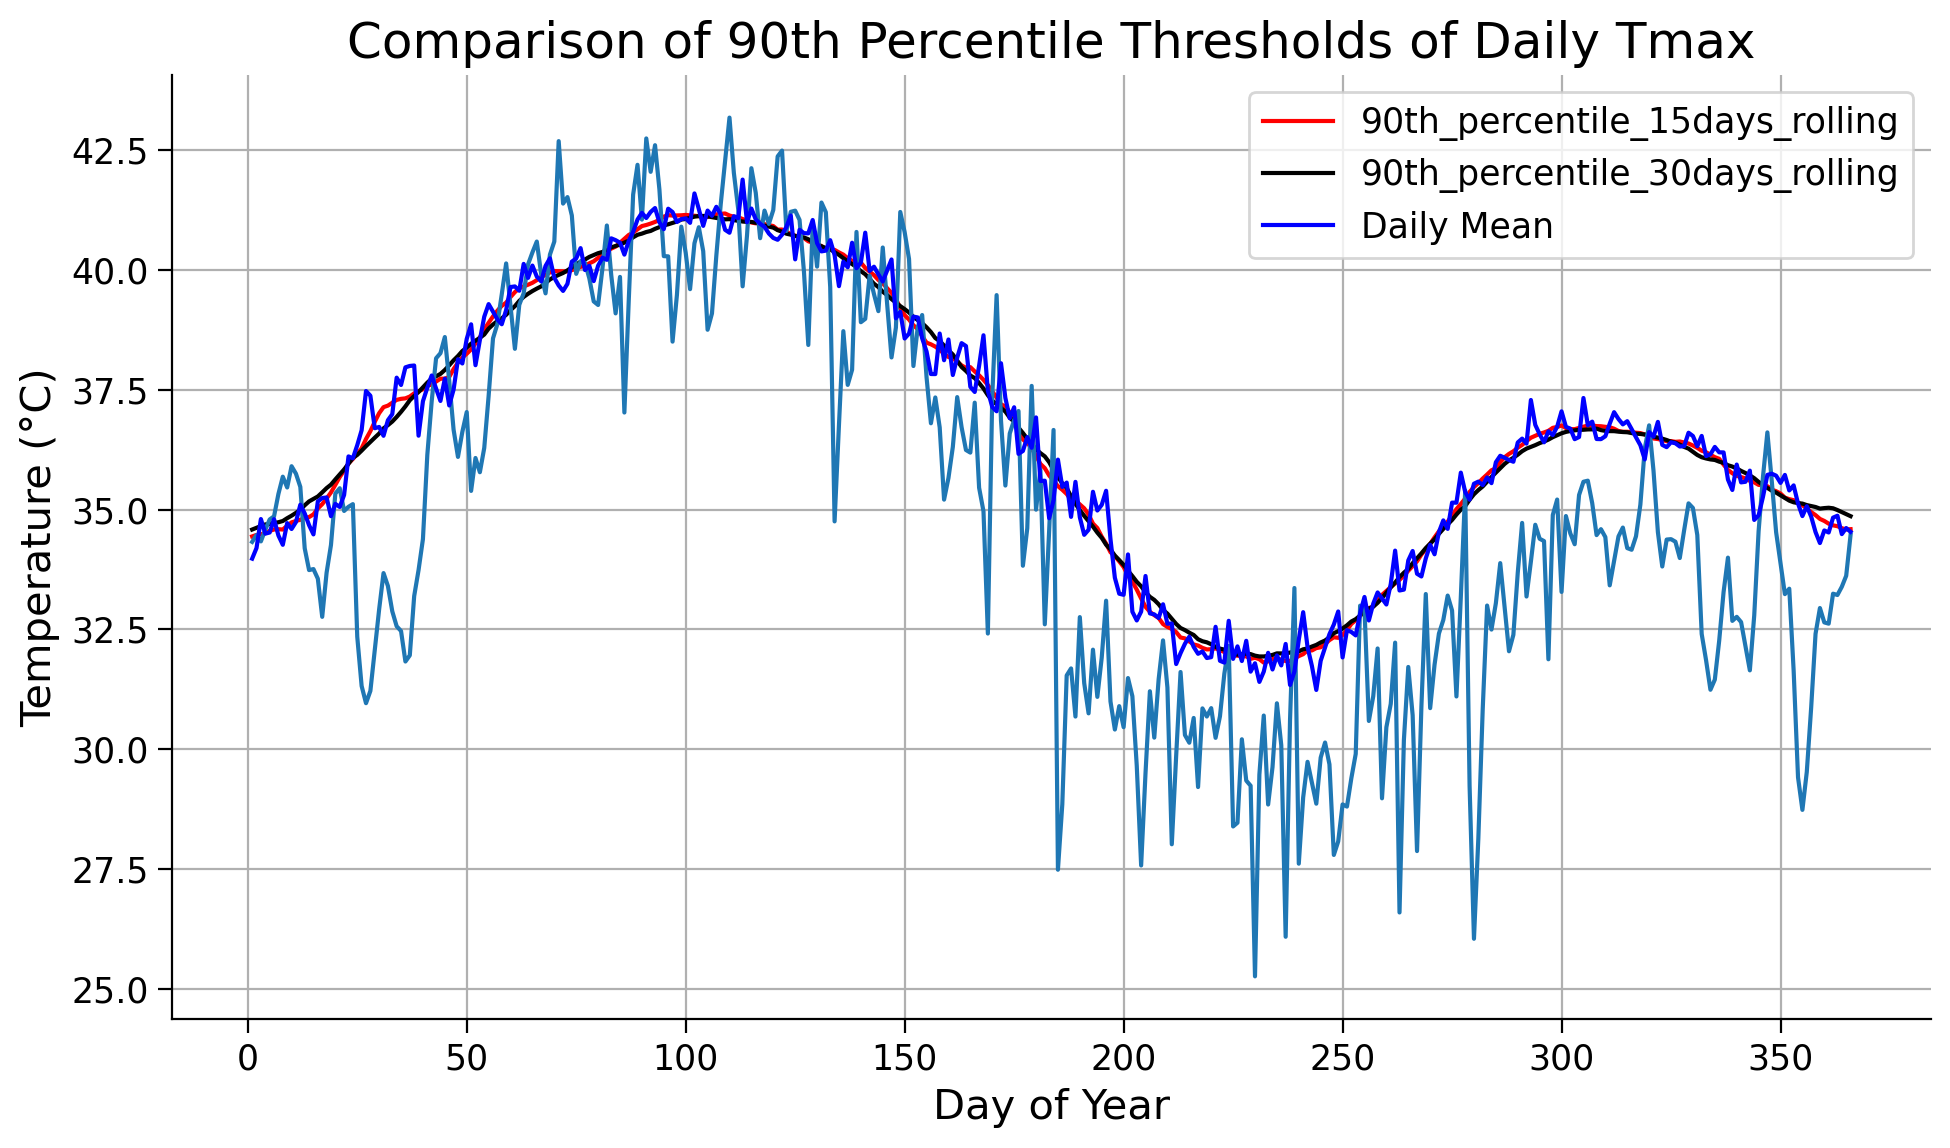

In [22]:
# Compare the different 90 th percentile definition
threshold_90_15 = compute_rolling_percentile_calendar_day(normal_ts,3)
threshold_90_30 = compute_rolling_percentile_calendar_day(normal_ts,15)
#######################"
plt.figure(figsize=(10, 6))

# Vérifie que les objets sont bien des DataArrays ou ont une dimension dayofyear
# Tracer les courbes avec des couleurs distinctes
normal_90p_ts.t2m.plot(label='90th_percentile_15days_rolling', color='red')
normal_90p_ts1.t2m.plot(label='90th_percentile_30days_rolling', color='black')
# threshold_90_15.t2m.plot(label='Rolling ±7 days)', color='green')
# threshold_90_30.t2m.plot(label='Rolling ±15 days', color='orange')
plt.plot(data_ts.t2m.sel(valid_time='2024').valid_time.dt.dayofyear, data_ts.t2m.sel(valid_time='2024'))
mask =  data_ts.t2m.sel(valid_time='2024') > normal_90p_ts1.t2m
#plt.fill_between(data_ts.t2m.sel(valid_time='2024').valid_time.dt.dayofyear, normal_90p_ts1.t2m,data_ts.t2m.sel(valid_time='2024'), where=mask)
#normal_90.t2m.plot(color='red')
# Si tu veux ajouter la climatologie moyenne aussi :
normal_90.t2m.plot(label='Daily Mean', color='blue')

plt.title("Comparison of 90th Percentile Thresholds of Daily Tmax")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#normal_90.t2m.plot(color="red")
#normal_90p_ts.t2m.plot(color="blue")
# normal_90p_ts1.t2m.plot(color="black")
# threshold_90_15.t2m.plot(color='green')
# threshold_90_30.t2m.plot(color='yellow')

#### 2024 heat waves visualisation

We will use this definition for the calculation of 90th percentile:
``` python
normal_90 = normal_ts.groupby('valid_time.dayofyear').quantile(0.90)
normal_90p_ts1 = normal_90.rolling(dayofyear=30, center=True, min_periods=1).mean()
```



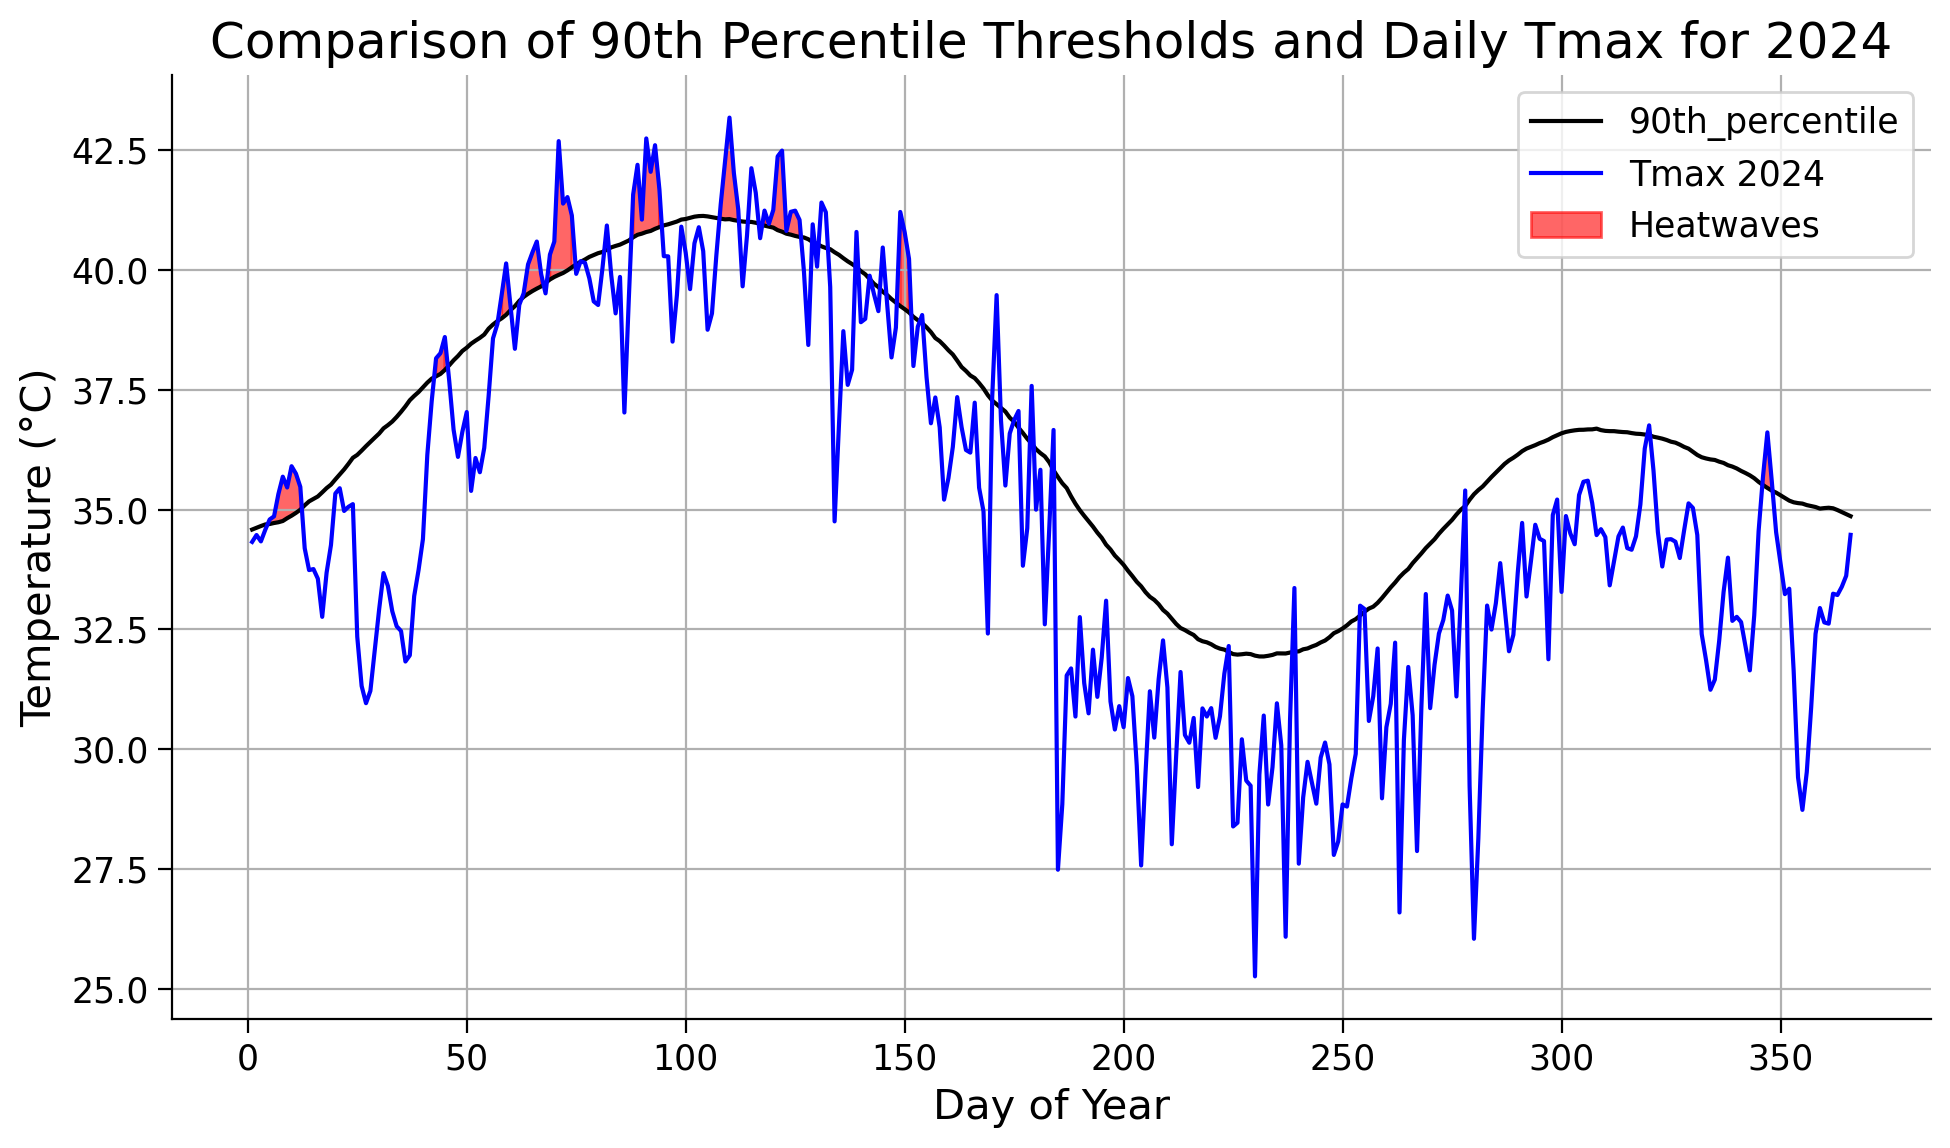

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Étape 1 : Extraire les températures et seuils
t2m_2024 = data_ts.t2m.sel(valid_time='2024')
dayofyear = t2m_2024.valid_time.dt.dayofyear
t2m_vals = t2m_2024.values
threshold_vals = normal_90p_ts1.t2m.values  # 90e percentile (30 jours)

# Étape 2 : Masque binaire (1 si dépassement)
mask = (t2m_vals > threshold_vals).astype(int)

# Étape 3 : Identifier les groupes de dépassements
labels, num_events = label(mask)

# Étape 4 : Construire le masque final (vagues de chaleur uniquement)
vague_mask = np.zeros_like(mask, dtype=bool)
for i in range(1, num_events + 1):
    indices = np.where(labels == i)[0]
    if len(indices) >= 3:  # condition vague de chaleur : ≥ 3 jours consécutifs
        vague_mask[indices] = True

# Étape 5 : Préparer les valeurs à tracer
filled_vals = np.where(vague_mask, t2m_vals, np.nan)

# === Tracé ===
plt.figure(figsize=(10, 6))
normal_90p_ts1.t2m.plot(label='90th_percentile', color='black')
plt.plot(dayofyear, t2m_vals, label="Tmax 2024", color="blue")

# Remplissage uniquement des vagues de chaleur
plt.fill_between(dayofyear, threshold_vals, filled_vals, where=vague_mask, color="red", alpha=0.6, label="Heatwaves")

plt.title("Comparison of 90th Percentile Thresholds and Daily Tmax for 2024")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [29]:
# Get heatwave dates as datetime objects
heatwave_dates = t2m_2024.valid_time.values[vague_mask]

# Print them
print("Heatwave days in 2024:")
for d in heatwave_dates:
    print(str(d)[:10])


    events = []

for i in range(1, num_events + 1):
    indices = np.where(labels == i)[0]
    if len(indices) >= 3:
        start = t2m_2024.valid_time.values[indices[0]]
        end   = t2m_2024.valid_time.values[indices[-1]]
        events.append((start, end, len(indices)))

print("Detected heatwaves in 2024:")
for start, end, duration in events:
    print(f"{str(start)[:10]} → {str(end)[:10]}  ({duration} days)")


print(len(heatwave_dates), "heatwave days detected in 2024")

import pandas as pd

# Convert to pandas datetime
heatwave_dates_pd = pd.to_datetime(heatwave_dates)

heatwave_dates_pd

heatwave_days_per_month = (
    pd.Series(1, index=heatwave_dates_pd)
    .groupby(heatwave_dates_pd.month)
    .sum()
)


heatwave_days_per_month.index = heatwave_days_per_month.index.map(
    lambda m: pd.Timestamp(year=2024, month=m, day=1).strftime('%B')
)

print("Heatwave days per month in 2024:")
print(heatwave_days_per_month)
    


Heatwave days in 2024:
2024-01-05
2024-01-06
2024-01-07
2024-01-08
2024-01-09
2024-01-10
2024-01-11
2024-01-12
2024-02-12
2024-02-13
2024-02-14
2024-02-27
2024-02-28
2024-02-29
2024-03-03
2024-03-04
2024-03-05
2024-03-06
2024-03-07
2024-03-09
2024-03-10
2024-03-11
2024-03-12
2024-03-13
2024-03-14
2024-03-28
2024-03-29
2024-03-30
2024-03-31
2024-04-01
2024-04-02
2024-04-03
2024-04-17
2024-04-18
2024-04-19
2024-04-20
2024-04-21
2024-04-27
2024-04-28
2024-04-29
2024-04-30
2024-05-01
2024-05-02
2024-05-03
2024-05-04
2024-05-05
2024-05-28
2024-05-29
2024-05-30
2024-12-11
2024-12-12
2024-12-13
Detected heatwaves in 2024:
2024-01-05 → 2024-01-12  (8 days)
2024-02-12 → 2024-02-14  (3 days)
2024-02-27 → 2024-02-29  (3 days)
2024-03-03 → 2024-03-07  (5 days)
2024-03-09 → 2024-03-14  (6 days)
2024-03-28 → 2024-04-03  (7 days)
2024-04-17 → 2024-04-21  (5 days)
2024-04-27 → 2024-05-05  (9 days)
2024-05-28 → 2024-05-30  (3 days)
2024-12-11 → 2024-12-13  (3 days)
52 heatwave days detected in 2024
Hea

#### heat waves detection

In [30]:
## Heatwaves detection
#ds_clim_avg_ts = data_ts.rolling(dayofyear=30, center=True, min_periods=1).mean()
MHW_ind = data_ts.groupby('dayofyear') - normal_90p_ts1
heat_flag = (MHW_ind >= 0)#.astype(int)
###
nb_1 = int((heat_flag.t2m == True).sum())
nb_0 = int((heat_flag.t2m == False).sum())
print(f"Nombre de jours au-dessus du seuil (True) : {nb_1}")
print(f"Nombre de jours en-dessous ou au seuil (False) : {nb_0}")


Nombre de jours au-dessus du seuil (True) : 1394
Nombre de jours en-dessous ou au seuil (False) : 9930


There are **1394** days for which the temperature is above the 90th percentile

In [31]:
def filter_short_true_runs(arr, min_length=3):
    labels, num = label(arr)  # Regroupe les blocs de 1 consécutifs (ou True)
    counts = np.bincount(labels)  # Compte la taille de chaque bloc
    valid = np.isin(labels, np.where(counts >= min_length)[0])  # Garde uniquement les blocs de taille >= min_length
    return valid & arr  # Ne garde que les True qui appartiennent aux bons blocs
MHW_ind_filtered = filter_short_true_runs(heat_flag.t2m,3)

In [32]:
############
# data for a year

labels, num = label(MHW_ind_filtered)
counts = np.bincount(labels)
print(f'Number of MHW events : {num}')
print(f'Max duration of MHW events : {max(counts[1:])} days')
print(f'Median duration of MHW events : {np.median(counts[1:])} days')

tmax_masked = np.where(MHW_ind_filtered,MHW_ind.t2m , np.nan)

print(f'Mean intensity of MHW events : + {np.nanmean(tmax_masked)} °C above 1991-2020 climatology')
print(f'Max intensity of MHW events : + {np.nanmax(tmax_masked)} °C above 1991-2020 climatology')


Number of MHW events : 144
Max duration of MHW events : 19 days
Median duration of MHW events : 4.0 days
Mean intensity of MHW events : + 0.7356889020974481 °C above 1991-2020 climatology
Max intensity of MHW events : + 4.111671715740407 °C above 1991-2020 climatology


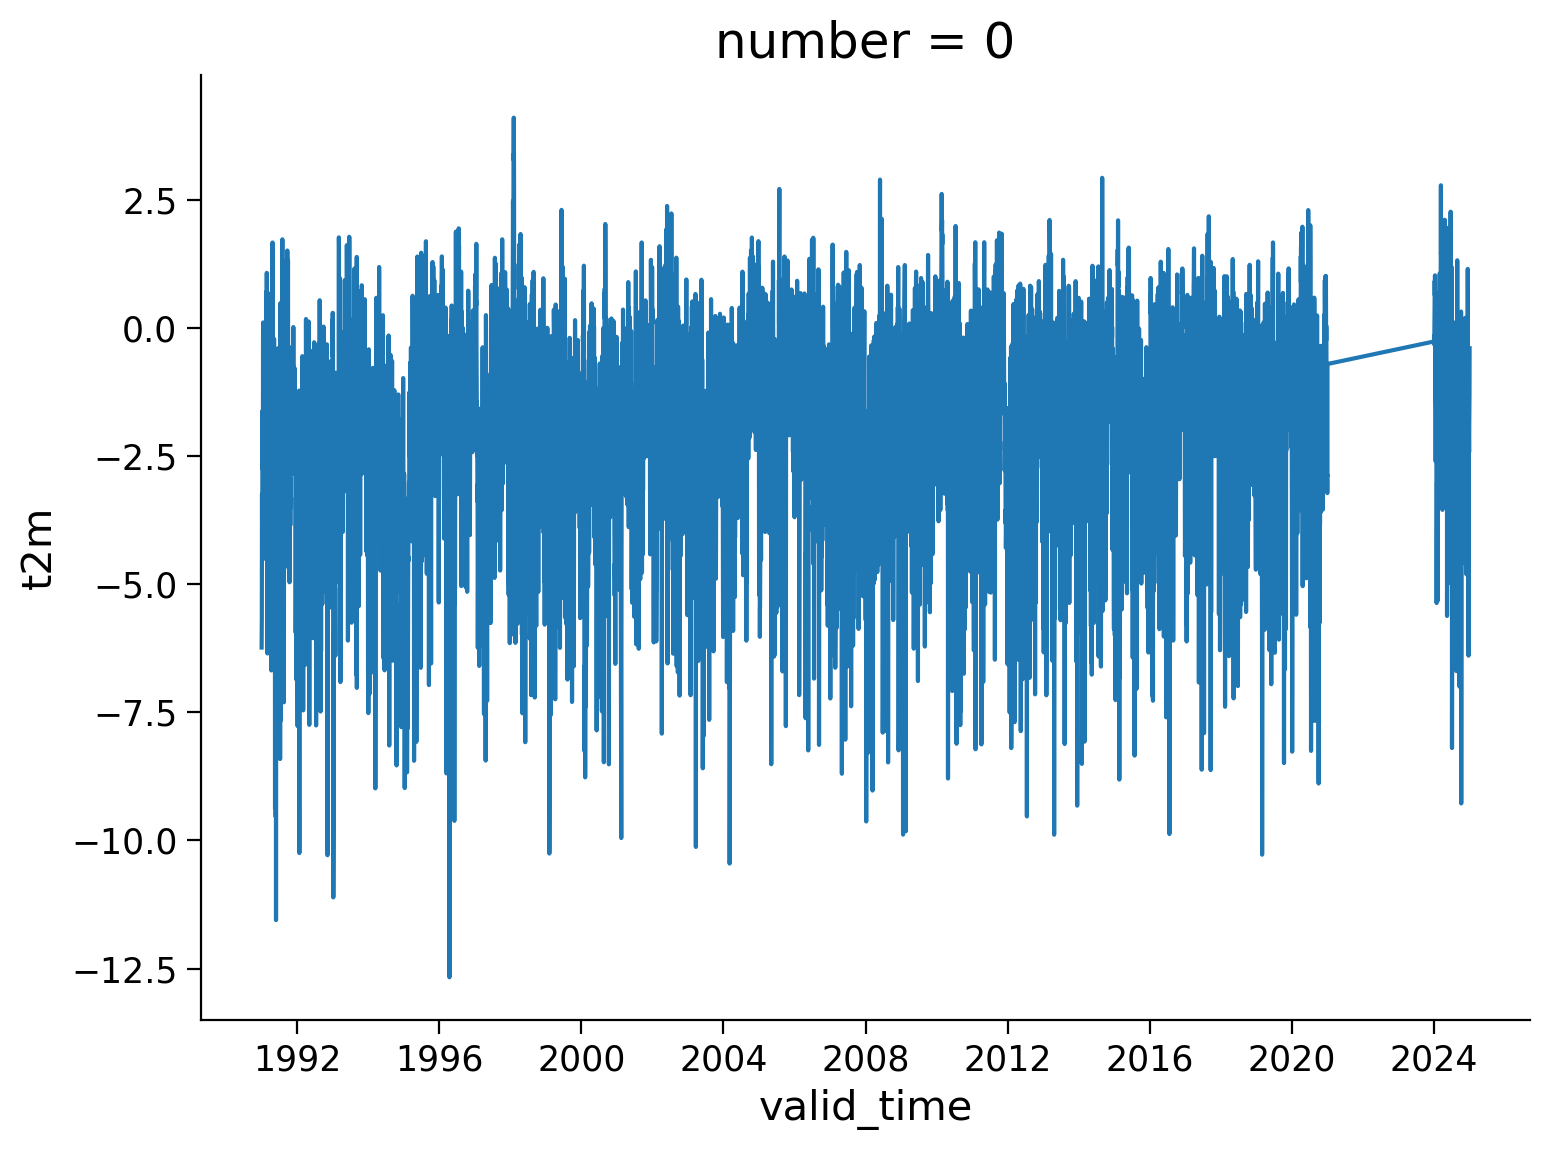

In [33]:
MHW_ind.t2m.plot()


## Heatwaves events over the years

In [34]:
#computing the indicators

nums = []
max_d = []
med_d = []

avg_t = []
max_t = []


#MHW_ind_filtered.sel(valid_time='2024')
for year in np.unique(MHW_ind_filtered['valid_time.year'].data):
    MHW_ind = data_ts.sel(valid_time=str(year)).groupby('dayofyear') - normal_90p_ts1
    heat_flag = (MHW_ind >= 0)#.astype(int)
    MHW_ind_filtered = filter_short_true_runs(heat_flag.t2m,3)
    
    labels, num = label(MHW_ind_filtered)
    nums.append(num)
    counts = np.bincount(labels)
    if num > 0:
        max_d.append(max(counts[1:]))
        med_d.append(np.median(counts[1:]))
        
        #sst_masked = np.where(MHW_ind_filtered, sst.data - ds_clim_avg_ts.analysed_sst+273.15 , np.nan)
        sst_masked = np.where(MHW_ind_filtered,MHW_ind.t2m , np.nan)

        avg_t.append(np.nanmean(sst_masked))
        max_t.append(np.nanmax(sst_masked))
    else:
        max_d.append(0)
        med_d.append(0)
        avg_t.append(0)
        max_t.append(0)



In [59]:
np.unique(data_ts['valid_time.year'].data)

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2024])

In [35]:
import pandas as pd
from scipy.ndimage import label

# Initialiser la liste pour stocker les résultats
heatwave_records = []

# Boucle sur les années disponibles
for year in np.unique(data_ts['valid_time.year'].data):
    
    # Étape 1 : calcul de l’anomalie pour cette année
    MHW_ind = data_ts.sel(valid_time=str(year)).groupby('dayofyear') - normal_90p_ts1
    heat_flag = (MHW_ind > 0).astype(int)

    # Étape 2 : filtrer les séquences < 3 jours
    heat_flag_filtered = filter_short_true_runs(heat_flag.t2m, 3)

    # Étape 3 : identifier les séquences avec label()
    labels, num_events = label(heat_flag_filtered)

    # Étape 4 : récupérer les dates et les valeurs
    times = data_ts.sel(valid_time=str(year)).valid_time.values
    anomalies = MHW_ind.t2m.values  # les intensités jour par jour

    for event_id in range(1, num_events + 1):
        indices = np.where(labels == event_id)[0]
        if len(indices) < 3:
            continue  # sécurité, même si le filtre est déjà appliqué

        # Dates
        start_date = times[indices[0]]
        end_date = times[indices[-1]]
        duration = len(indices)

        # Day of year (entre 1 et 366)
        start_doy = pd.to_datetime(start_date).dayofyear
        end_doy = pd.to_datetime(end_date).dayofyear

        # Intensités (Tmax - seuil)
        intensities = anomalies[indices]

        # Sauvegarde des infos dans un dictionnaire
        heatwave_records.append({
            'year': year,
            'start_date': str(start_date)[:10],
            'end_date': str(end_date)[:10],
            'start_doy': start_doy,
            'end_doy': end_doy,
            'duration': duration,
            'min_intensity': float(np.nanmin(intensities)),
            'mean_intensity': float(np.nanmean(intensities)),
            'median_intensity': float(np.nanmedian(intensities)),
            'max_intensity': float(np.nanmax(intensities)),
            
        })

# Convertir en DataFrame final
df_heatwaves = pd.DataFrame(heatwave_records)


In [36]:
df_heatwaves

,year,start_date,end_date,start_doy,end_doy,duration,min_intensity,mean_intensity,median_intensity,max_intensity
0,1991,1991-03-30,1991-04-01,89,91,3,0.020765,0.127097,0.095391,0.265135
1,1991,1991-09-14,1991-09-16,257,259,3,0.631320,0.989852,1.009181,1.329054
2,1991,1991-09-20,1991-09-23,263,266,4,0.419334,0.770760,0.573013,1.517680
3,1991,1991-09-27,1991-09-29,270,272,3,0.264575,0.858958,0.983670,1.328628
4,1993,1993-03-04,1993-03-06,63,65,3,1.409252,1.594359,1.599231,1.774594
...,...,...,...,...,...,...,...,...,...,...
139,2024,2024-03-28,2024-04-03,88,94,7,0.292305,1.194541,1.234000,1.952942
140,2024,2024-04-17,2024-04-21,108,112,5,0.237905,0.972960,0.984760,2.118440
141,2024,2024-04-27,2024-05-05,118,126,9,0.057830,0.598590,0.368447,1.692217
142,2024,2024-05-28,2024-05-30,149,151,3,1.116892,1.562111,1.605259,1.964183


In [37]:
# Agrégation des indicateurs annuels depuis le tableau des vagues
grouped = df_heatwaves.groupby('year')

# Nombre d'événements par an
nums = grouped.size().values

# Durée max et médiane par an
max_d = grouped['duration'].max().values
med_d = grouped['duration'].median().values

# Intensité moyenne et maximale par an
avg_t = grouped['mean_intensity'].mean().values
max_t = grouped['max_intensity'].max().values

# Liste des années (assure l’ordre)
x = grouped.size().index.values


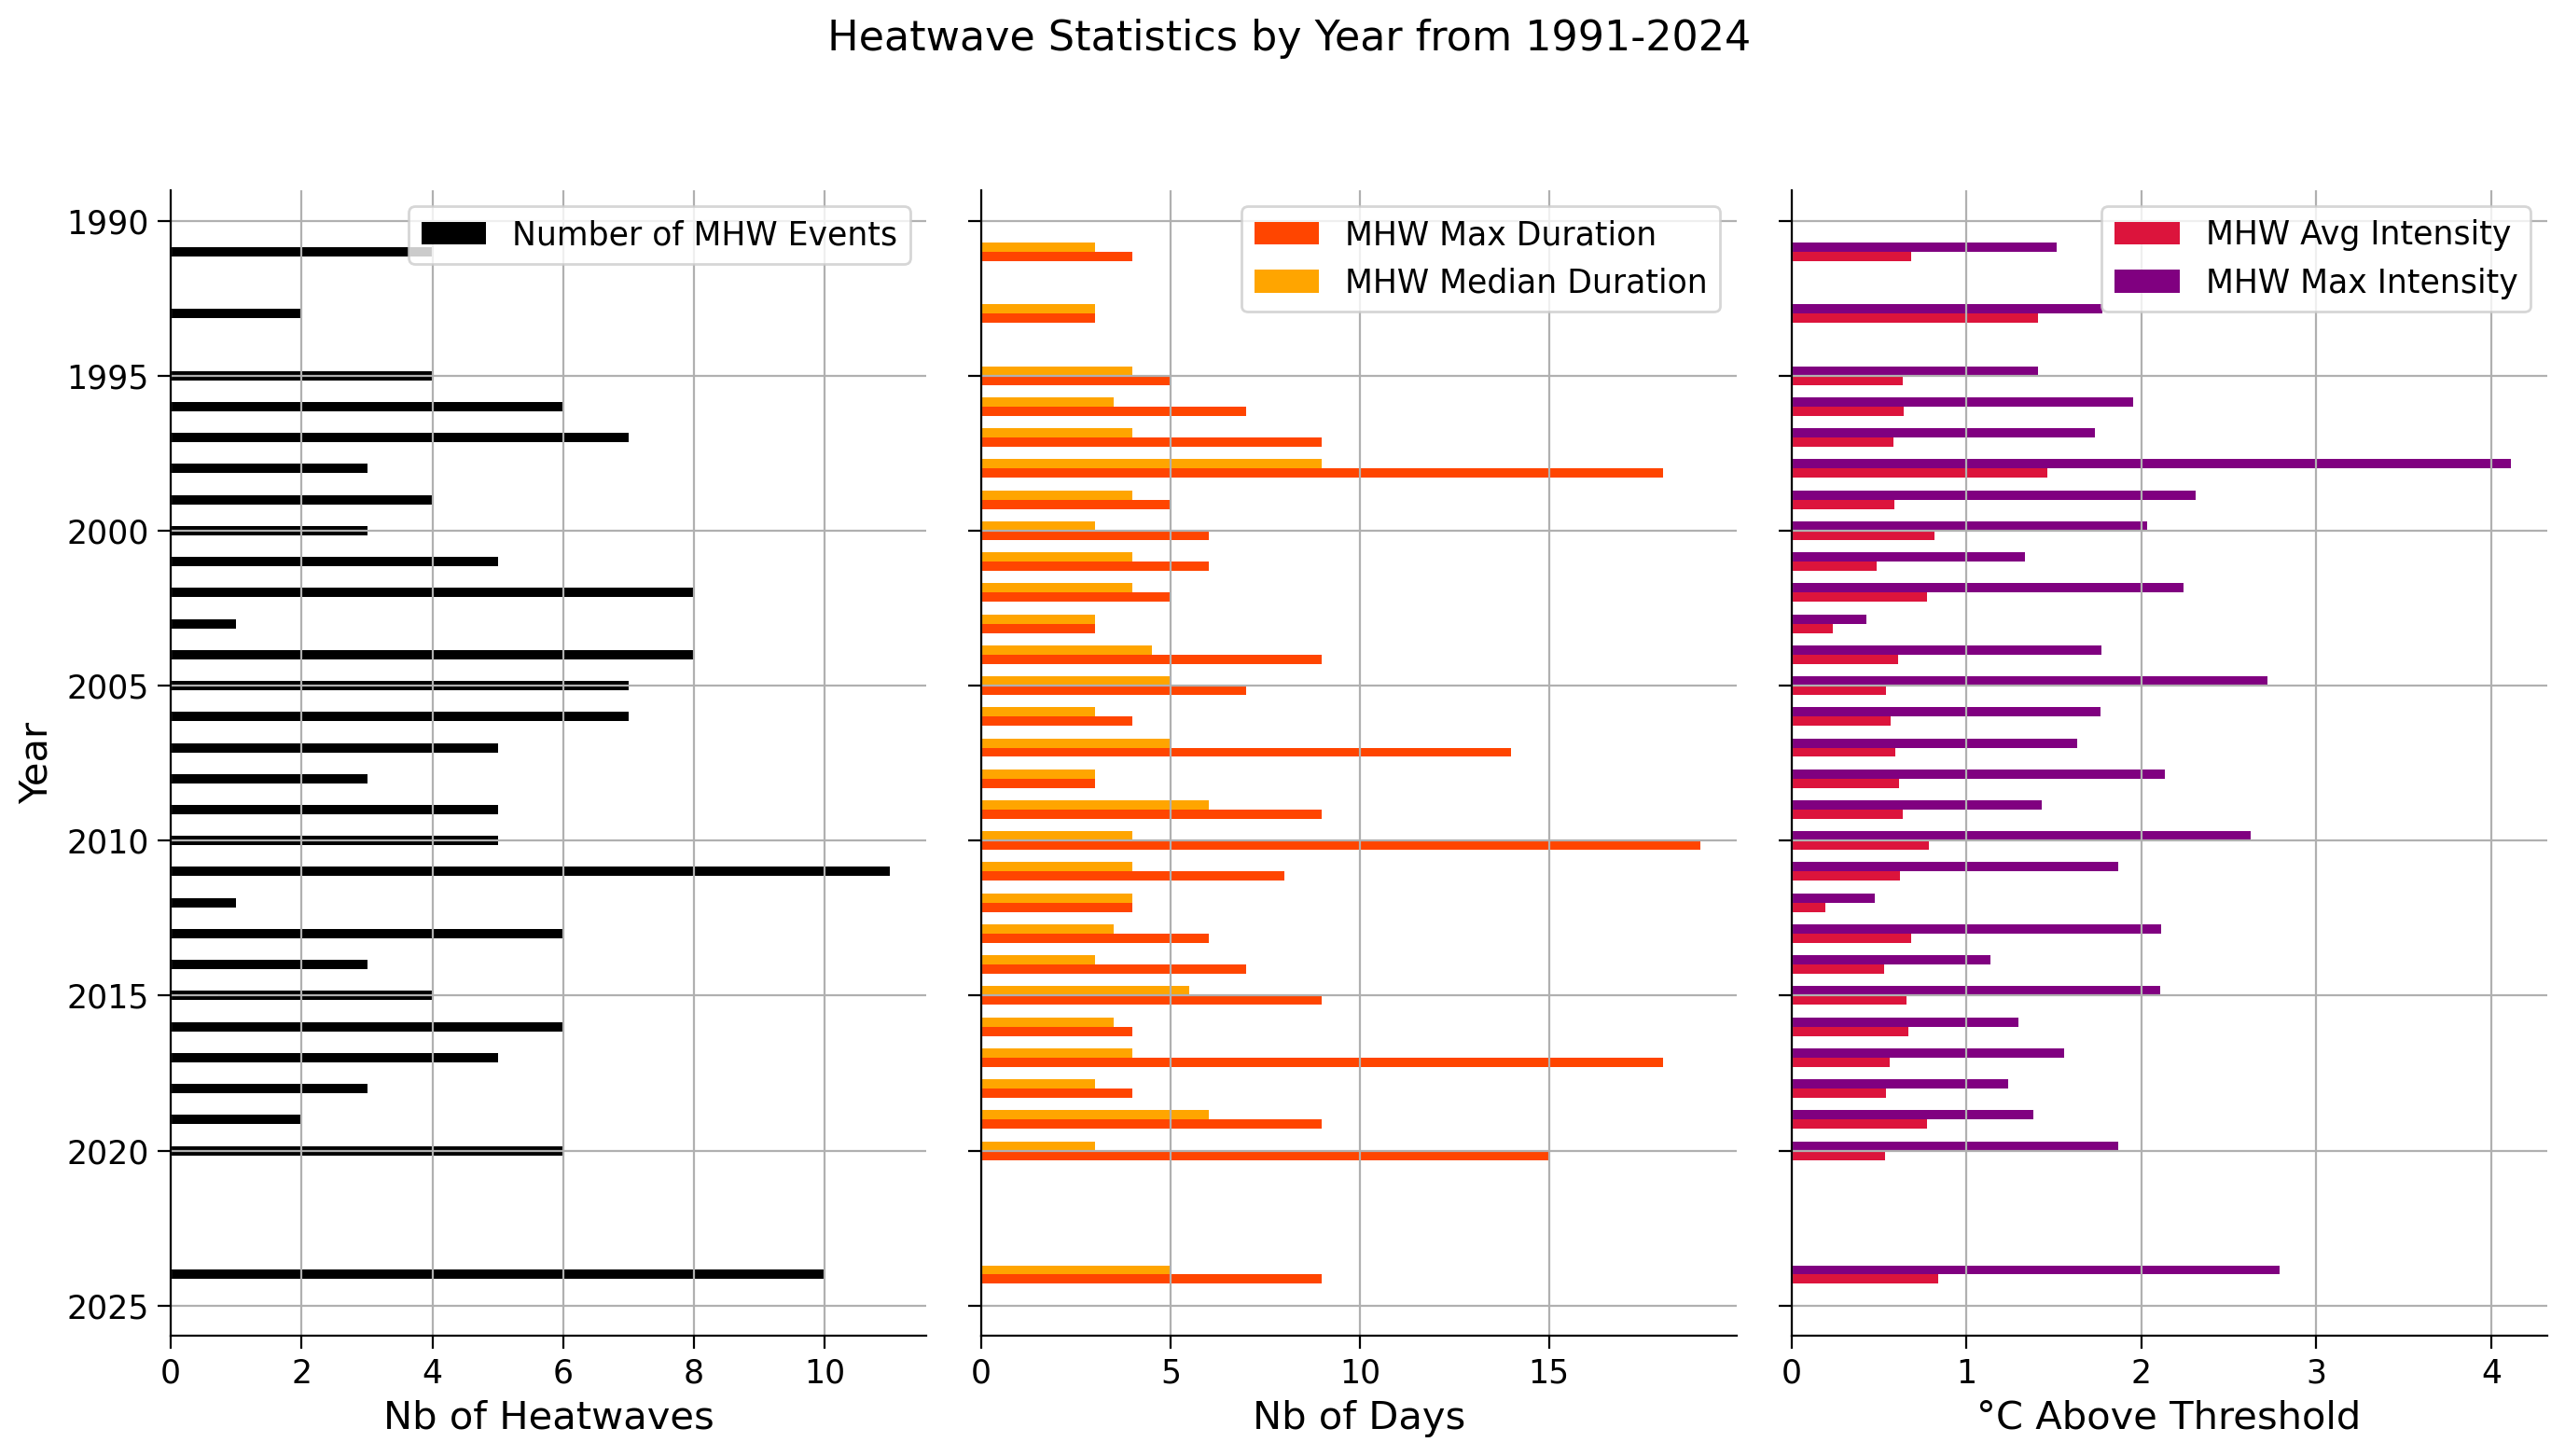

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# S'assurer que x est un tableau numpy
x = np.array(x)

fig, axes = plt.subplots(1, 3, figsize=(14, 8), sharey=True)

# Plot 1 : nombre de vagues par an
axes[0].barh(x, nums, height=0.3, label='Number of MHW Events', color='k')
axes[0].invert_yaxis()
axes[0].grid(True)
axes[0].legend()
axes[0].set_ylabel("Year")
axes[0].set_xlabel('Nb of Heatwaves')

# Plot 2 : durées
axes[1].barh(x + 0.15, max_d, height=0.3, label='MHW Max Duration', color='orangered')
axes[1].barh(x - 0.15, med_d, height=0.3, label='MHW Median Duration', color='orange')
axes[1].invert_yaxis()
axes[1].grid(True)
axes[1].legend()
axes[1].set_xlabel('Nb of Days')

# Plot 3 : intensités
axes[2].barh(x + 0.15, avg_t, height=0.3, label='MHW Avg Intensity', color='crimson')
axes[2].barh(x - 0.15, max_t, height=0.3, label='MHW Max Intensity', color='purple')
axes[2].invert_yaxis()
axes[2].grid(True)
axes[2].legend()
axes[2].set_xlabel('°C Above Threshold')

plt.suptitle(" Heatwave Statistics by Year from 1991-2024", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


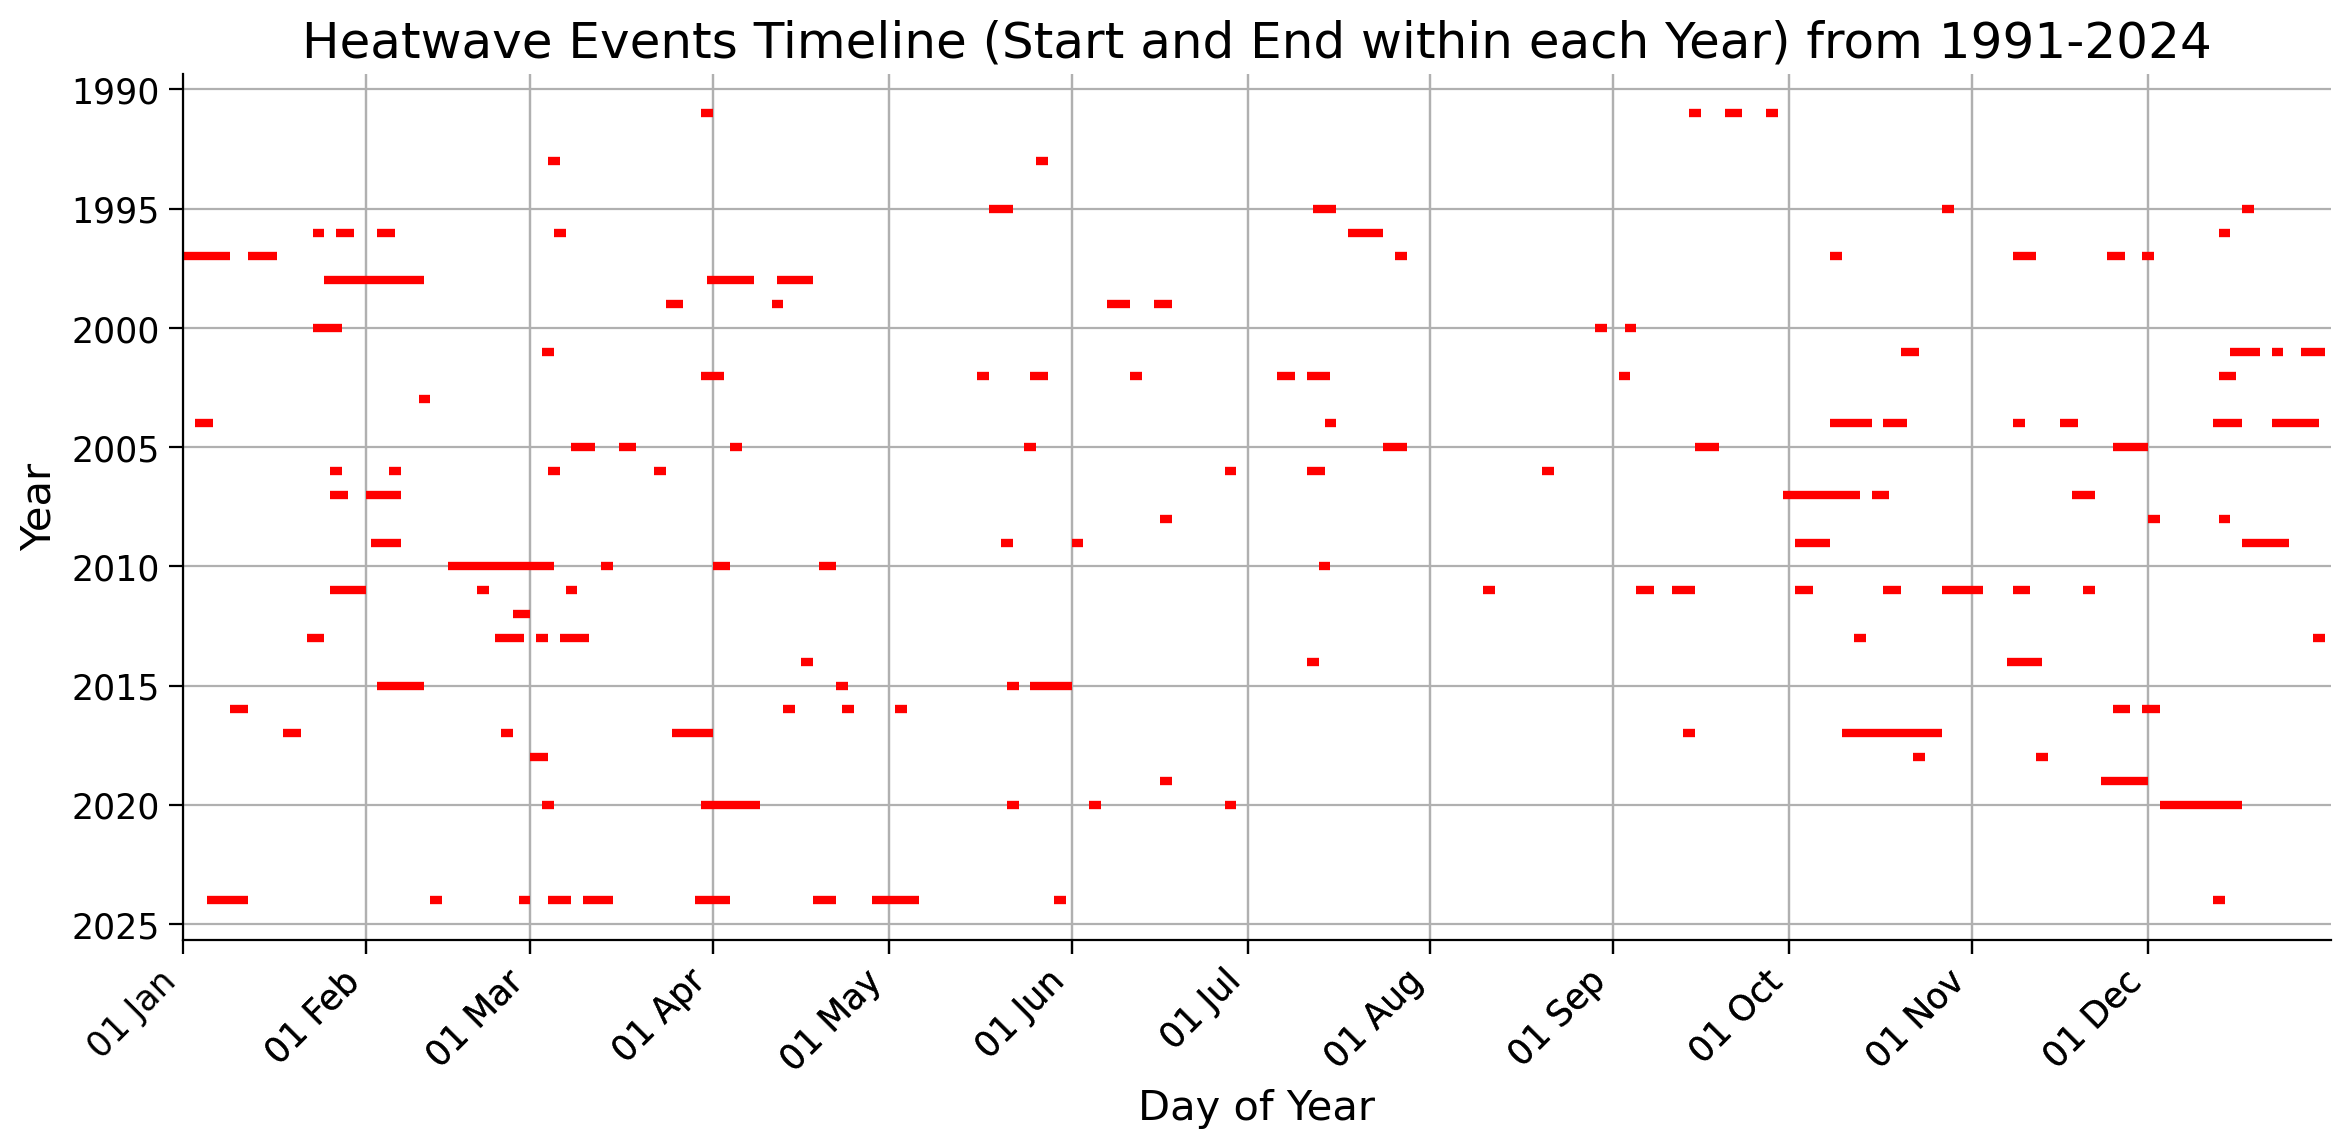

In [39]:
import matplotlib.pyplot as plt

# Générer les dates du 1er et 15 de chaque mois (année fictive non bissextile)
dates = pd.date_range("2001-01-01", "2001-12-31", freq="MS").tolist() + \
        pd.date_range("2001-01-15", "2001-12-15", freq="MS").tolist()

dates = sorted(dates)  # trier chronologiquement

# Ticks en dayofyear
tick_positions = [d.dayofyear for d in dates]
tick_labels = [d.strftime("%d %b") for d in dates]  # ex: "01 Jan", "15 Jan"

fig, ax = plt.subplots(figsize=(12, 6))

# Tracer chaque vague comme une ligne horizontale
for _, row in df_heatwaves.iterrows():
    y = row['year']
    x_start = row['start_doy']
    x_end = row['end_doy']
    ax.hlines(y=y, xmin=x_start, xmax=x_end, color='red', linewidth=3)

# Mise en forme
ax.set_xlabel("Day of Year")
ax.set_ylabel("Year")
ax.set_title("Heatwave Events Timeline (Start and End within each Year) from 1991-2024")
ax.grid(True)
ax.set_xlim(1, 366)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')
ax.invert_yaxis()  # pour avoir les années récentes en haut (facultatif)
plt.tight_layout()
plt.show()


In [40]:
df_stats = pd.DataFrame({
    'year': x,
    'num_events': nums,
    'max_duration': max_d,
    'med_duration': med_d,
    'avg_intensity': avg_t,
    'max_intensity': max_t
})


In [ ]:
df_stats.to_csv("../../data/yearly_statistics.csv")

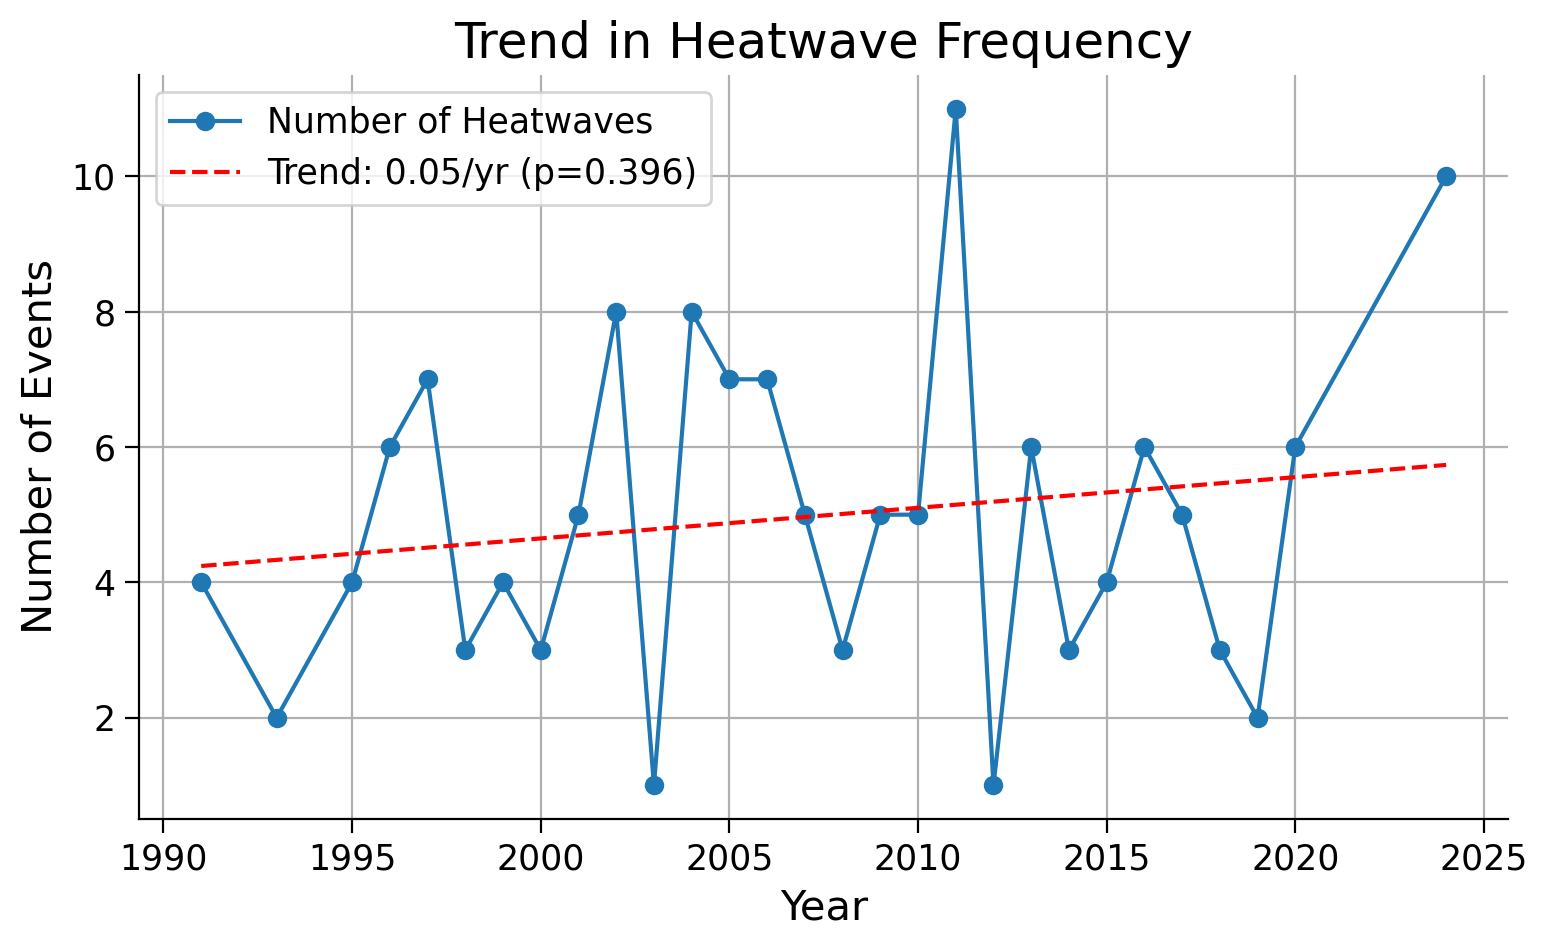

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Variable à analyser
years = df_stats['year']
values = df_stats['num_events']

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(years, values)

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(years, values, 'o-', label='Number of Heatwaves')
plt.plot(years, intercept + slope * years, 'r--', label=f'Trend: {slope:.2f}/yr (p={p_value:.3f})')
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Trend in Heatwave Frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


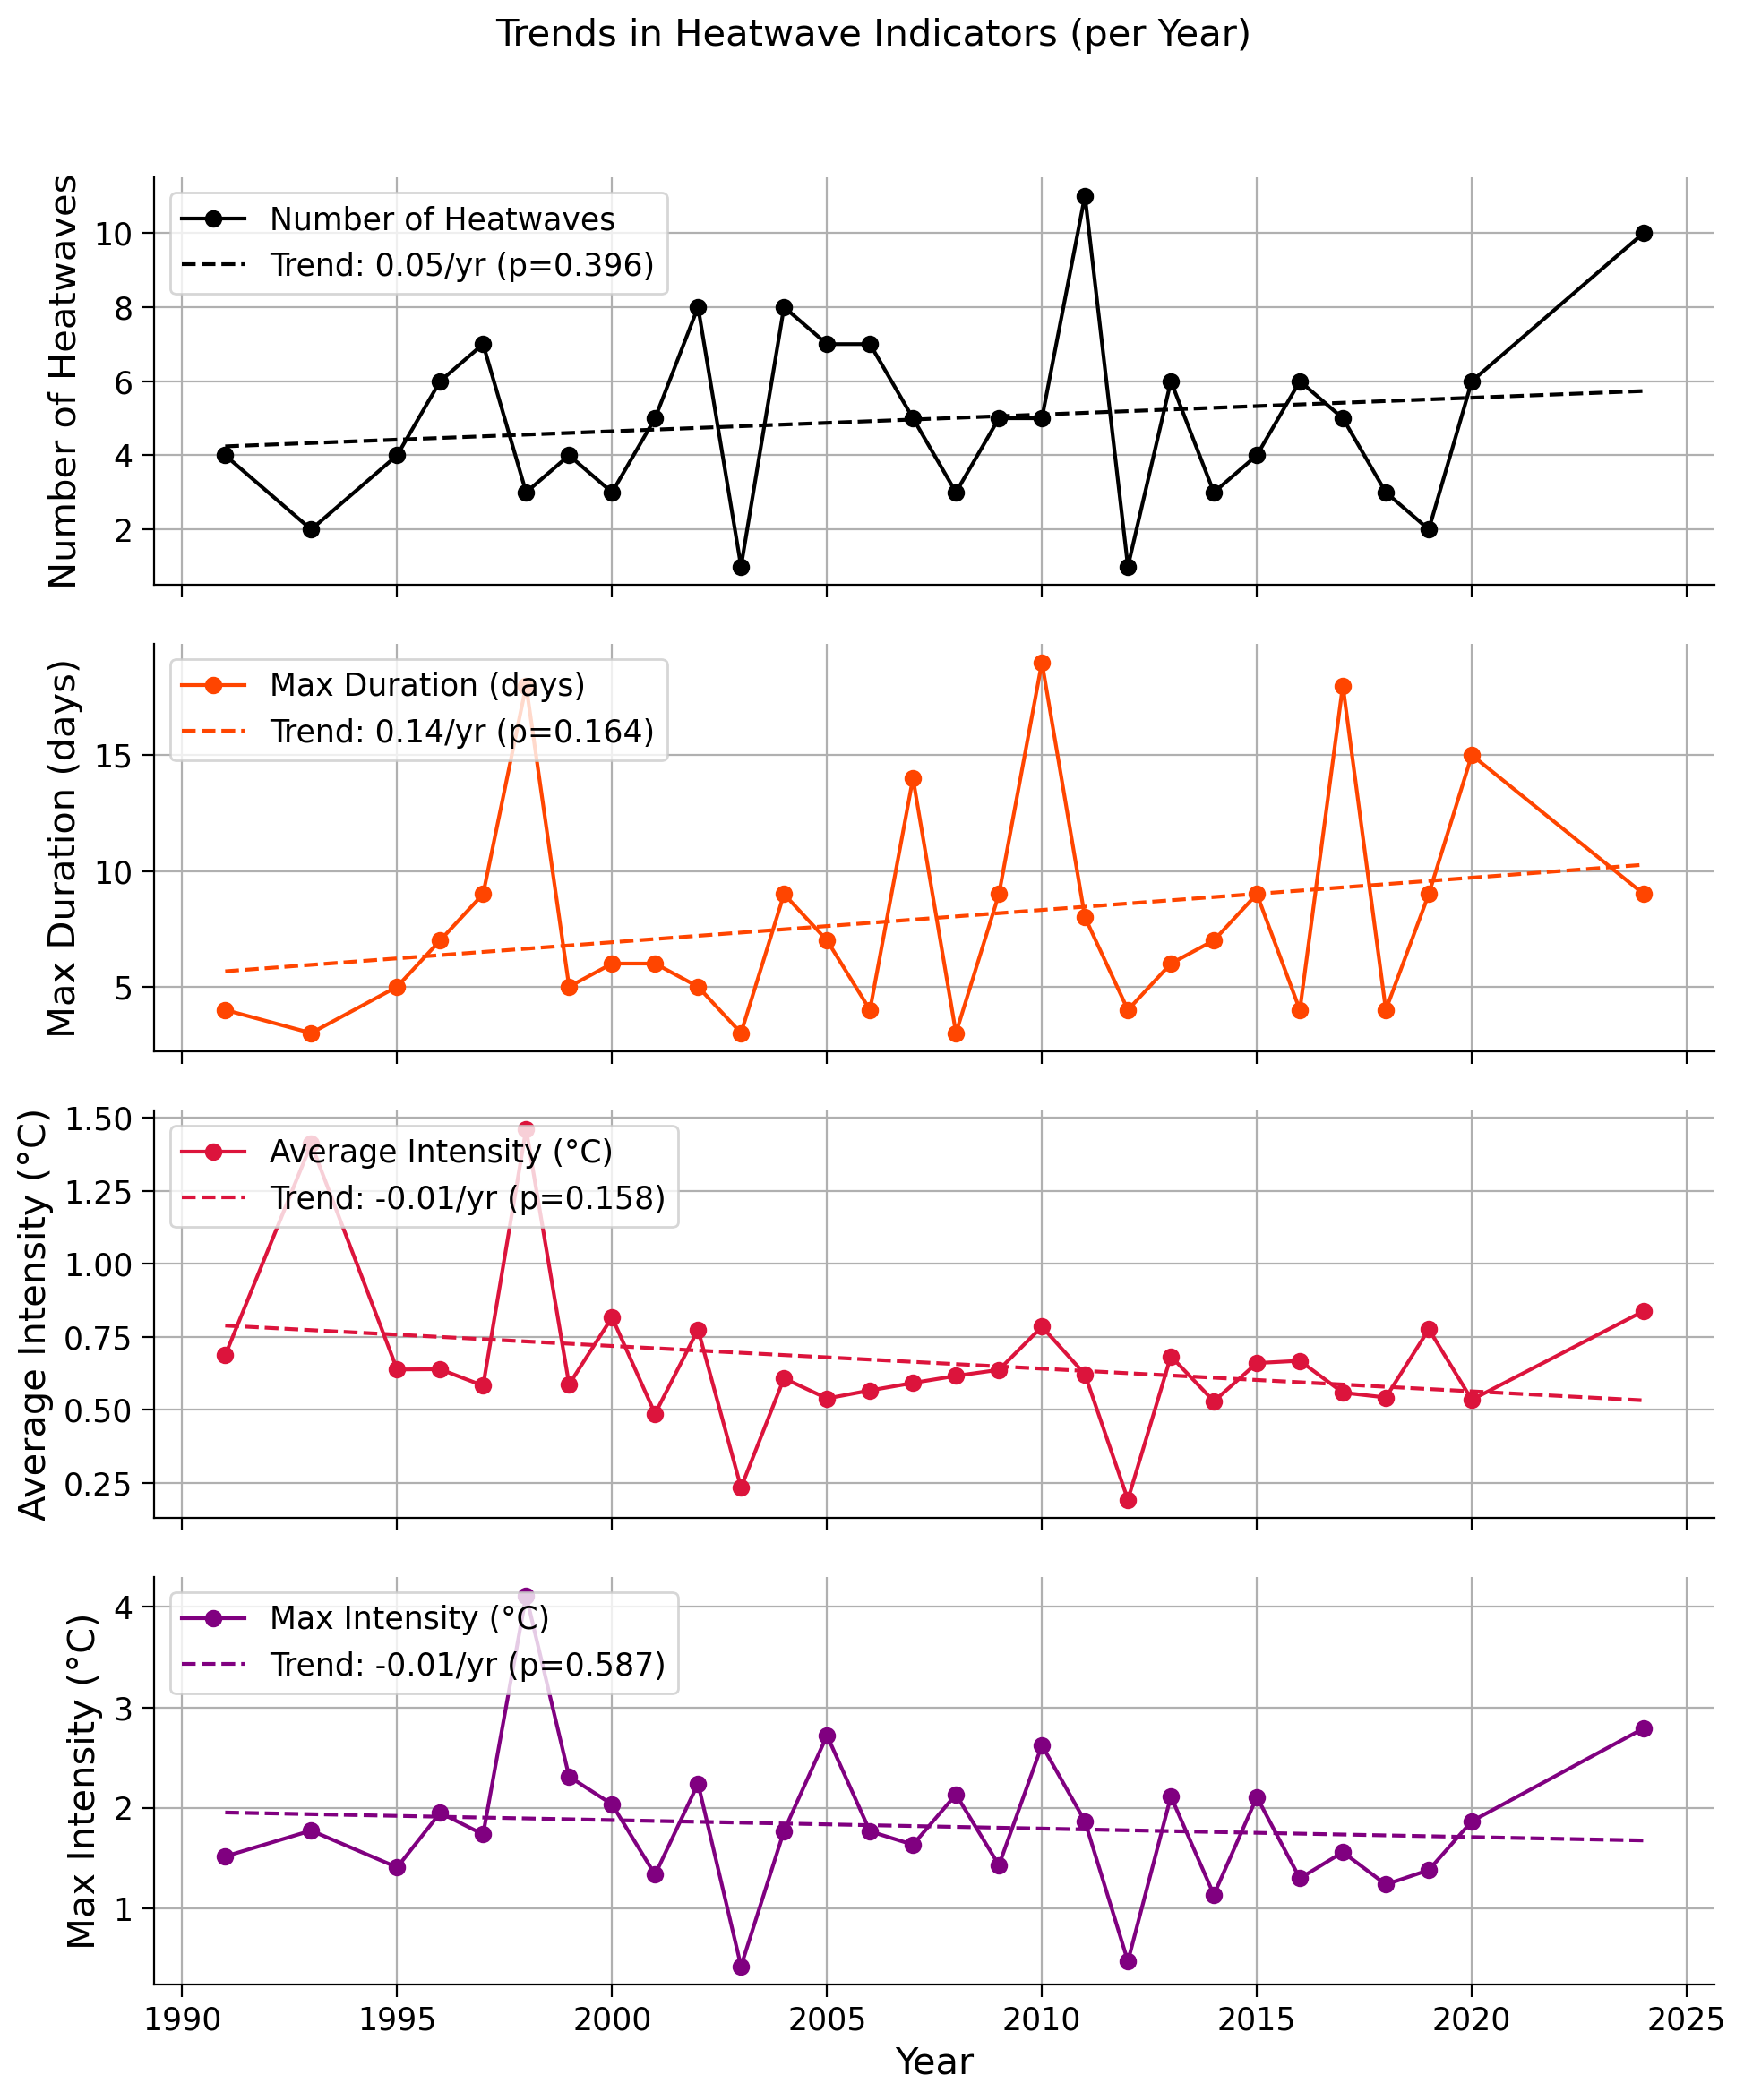

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Variables à tracer
variables = {
    'num_events': {'label': 'Number of Heatwaves', 'color': 'black'},
    'max_duration': {'label': 'Max Duration (days)', 'color': 'orangered'},
    'avg_intensity': {'label': 'Average Intensity (°C)', 'color': 'crimson'},
    'max_intensity': {'label': 'Max Intensity (°C)', 'color': 'purple'},
}

# Créer les subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharex=True)

x = df_stats['year']

for i, (var, props) in enumerate(variables.items()):
    y = df_stats[var]
    
    # Tracer les points
    axes[i].plot(x, y, 'o-', color=props['color'], label=props['label'])

    # Droite de tendance
    slope, intercept, r, p, _ = linregress(x, y)
    trend = intercept + slope * x
    axes[i].plot(x, trend, '--', color=props['color'],
                 label=f"Trend: {slope:.2f}/yr (p={p:.3f})")

    # Mise en forme
    axes[i].set_ylabel(props['label'])
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Titre global et label X commun
axes[-1].set_xlabel("Year")
plt.suptitle("Trends in Heatwave Indicators (per Year)", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


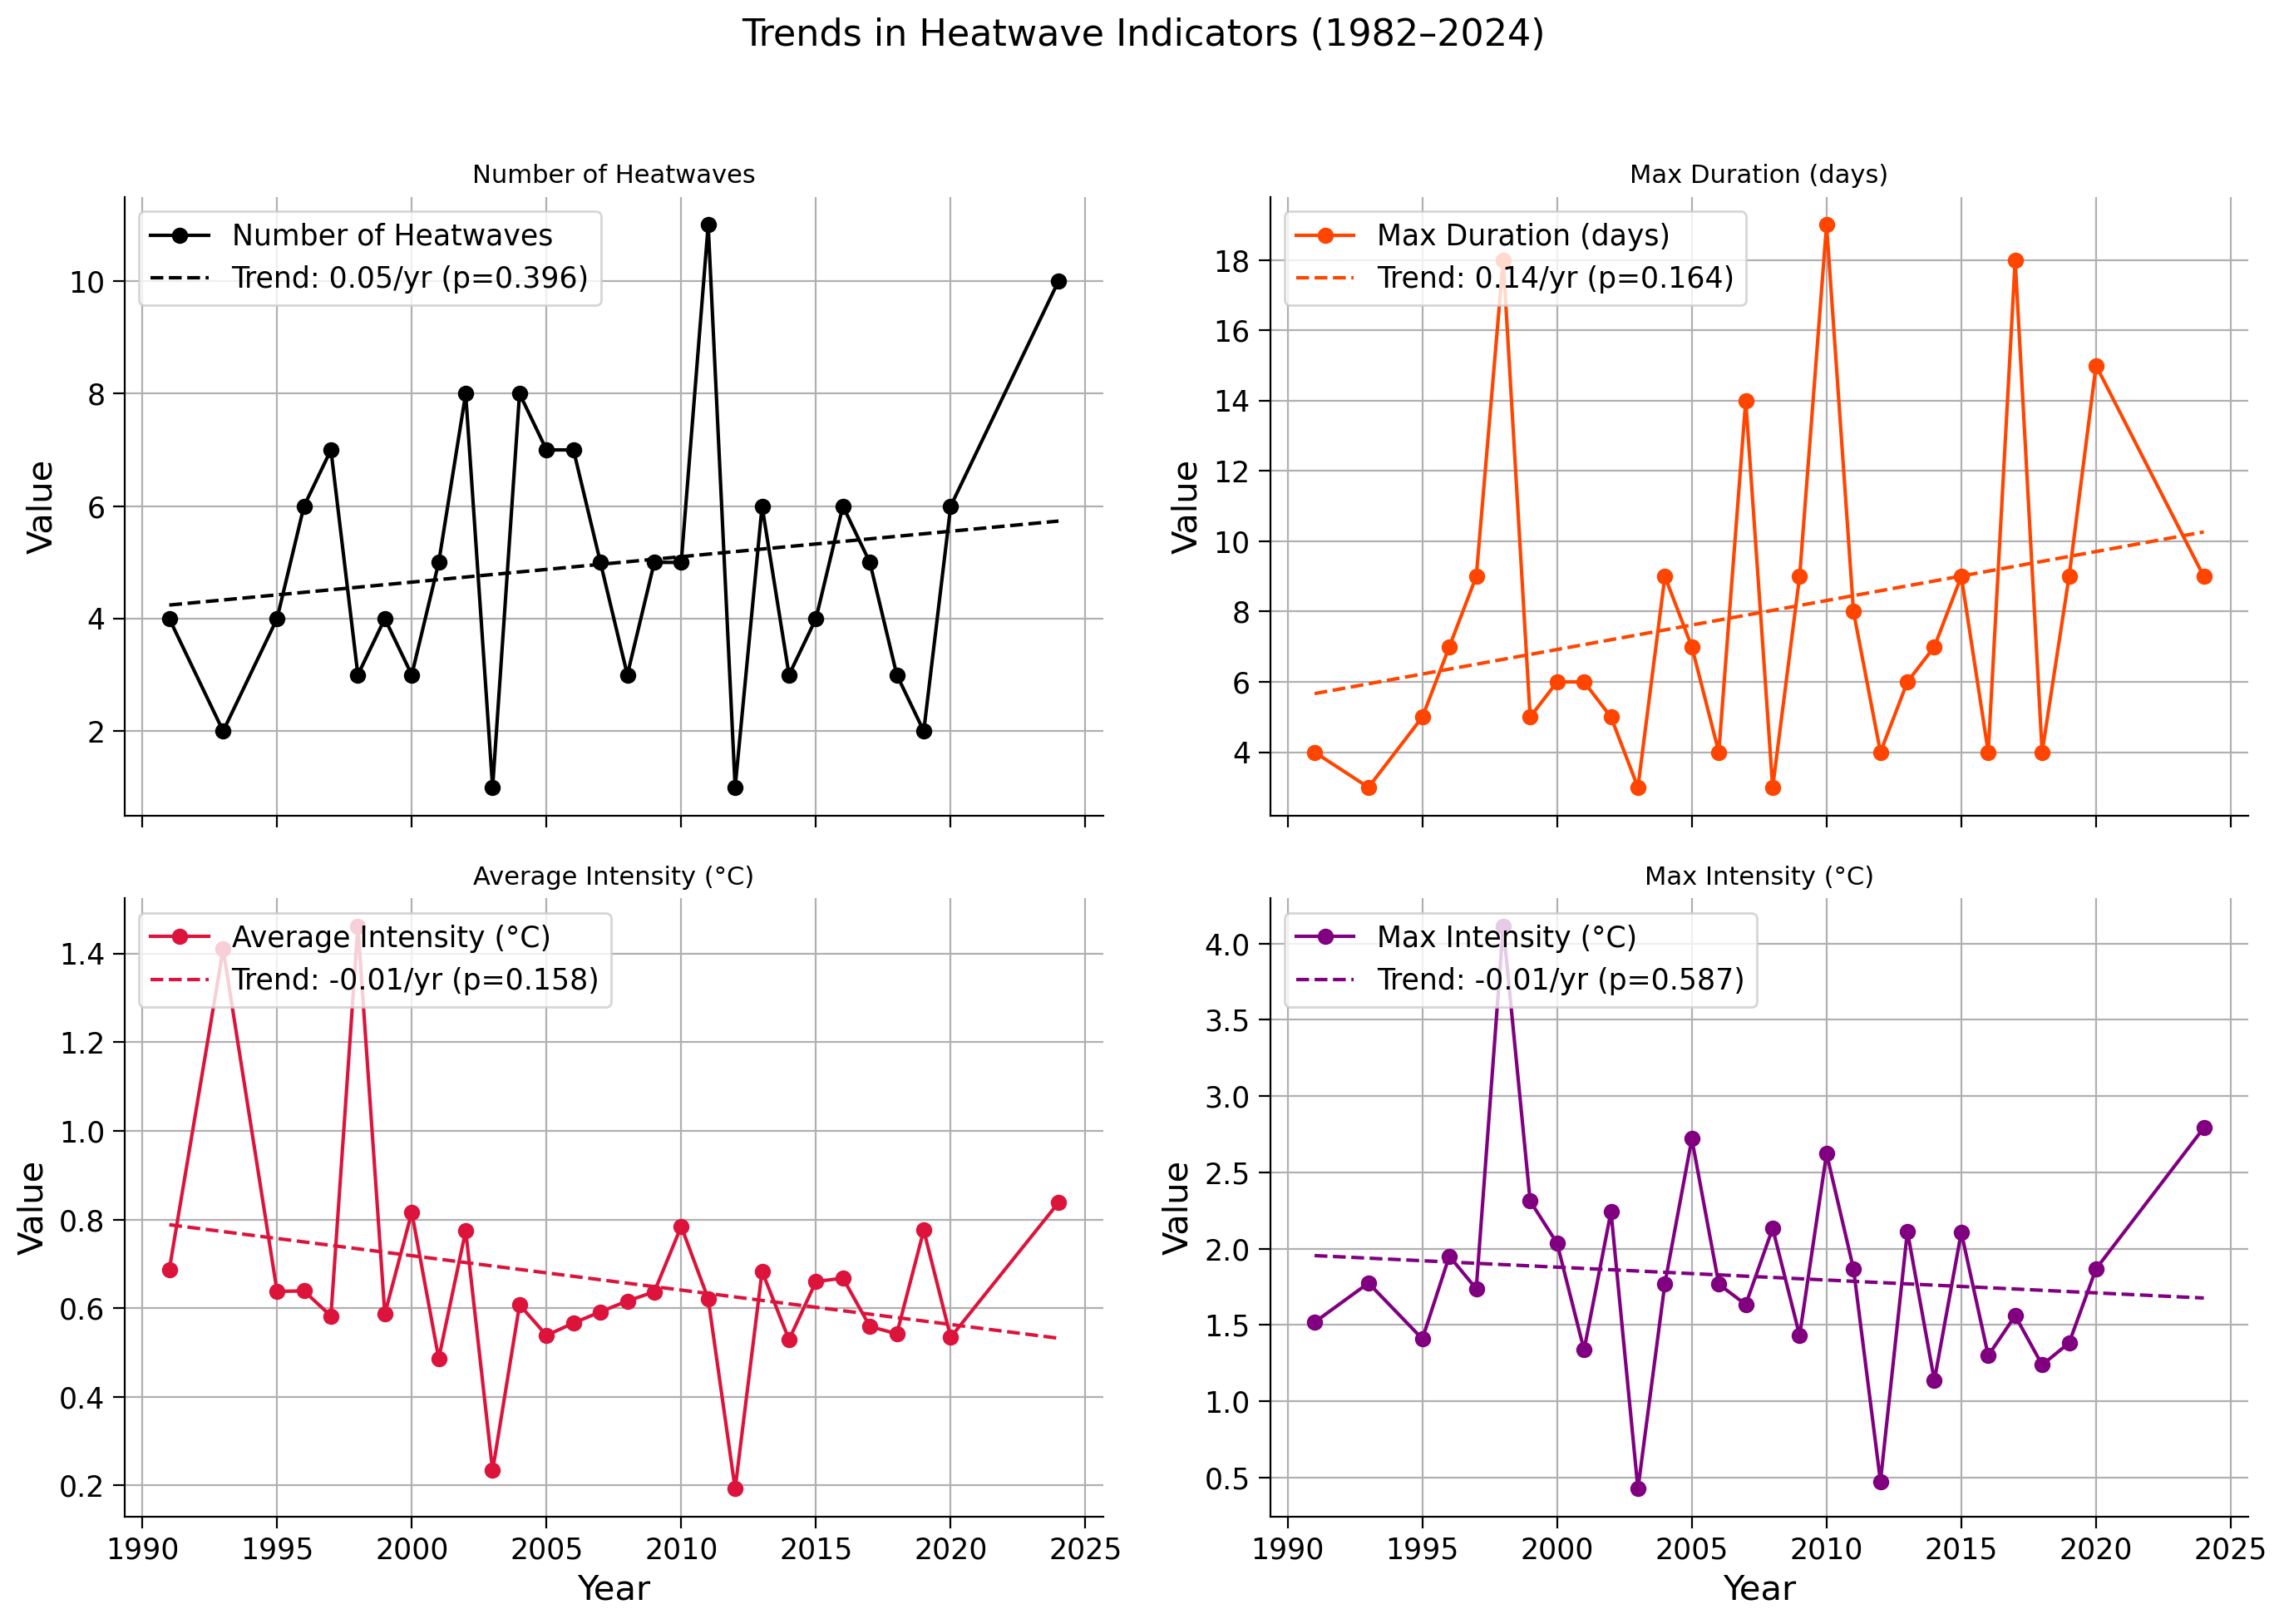

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Variables à tracer
variables = {
    'num_events': {'label': 'Number of Heatwaves', 'color': 'black'},
    'max_duration': {'label': 'Max Duration (days)', 'color': 'orangered'},
    'avg_intensity': {'label': 'Average Intensity (°C)', 'color': 'crimson'},
    'max_intensity': {'label': 'Max Intensity (°C)', 'color': 'purple'},
}

x = df_stats['year']

# Initialisation des subplots : 2 lignes, 2 colonnes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)
axes = axes.flatten()  # Pour itérer facilement sur les axes

for i, (var, props) in enumerate(variables.items()):
    y = df_stats[var]
    
    # Tracer la série
    axes[i].plot(x, y, 'o-', color=props['color'], label=props['label'])

    # Droite de tendance
    slope, intercept, r, p, _ = linregress(x, y)
    trend = intercept + slope * x
    axes[i].plot(x, trend, '--', color=props['color'],
                 label=f"Trend: {slope:.2f}/yr (p={p:.3f})")

    # Mise en forme
    axes[i].set_title(props['label'], fontsize=11)
    axes[i].set_ylabel("Value")
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Ajouter le label X uniquement aux graphiques du bas
axes[2].set_xlabel("Year")
axes[3].set_xlabel("Year")

# Titre général
plt.suptitle("Trends in Heatwave Indicators (1982–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [44]:
print("Top 5 years with highest values for each heatwave indicator:\n")

for var in ['num_events', 'max_duration', 'avg_intensity', 'max_intensity']:
    print(f"→ {var}:")
    top5 = df_stats.sort_values(by=var, ascending=False).head(5)[['year', var]]
    for _, row in top5.iterrows():
        print(f"   - {int(row['year'])}: {row[var]:.2f}")
    print()



Top 5 years with highest values for each heatwave indicator:

→ num_events:
   - 2011: 11.00
   - 2024: 10.00
   - 2002: 8.00
   - 2004: 8.00
   - 1997: 7.00

→ max_duration:
   - 2010: 19.00
   - 2017: 18.00
   - 1998: 18.00
   - 2020: 15.00
   - 2007: 14.00

→ avg_intensity:
   - 1998: 1.46
   - 1993: 1.41
   - 2024: 0.84
   - 2000: 0.82
   - 2010: 0.78

→ max_intensity:
   - 1998: 4.11
   - 2024: 2.79
   - 2005: 2.72
   - 2010: 2.62
   - 1999: 2.31

